# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [3]:
# if plotnine is not installed in Jupter then use the following command to install it 
!pip install plotnine

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

statsmodels 0.13.2 requires patsy>=0.5.2, but you'll have patsy 0.5.1 which is incompatible.



  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0


Running this project require the following imports 

In [85]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram,linkage,ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



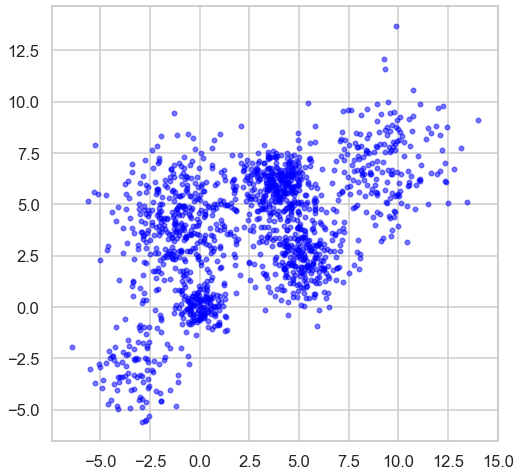

In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

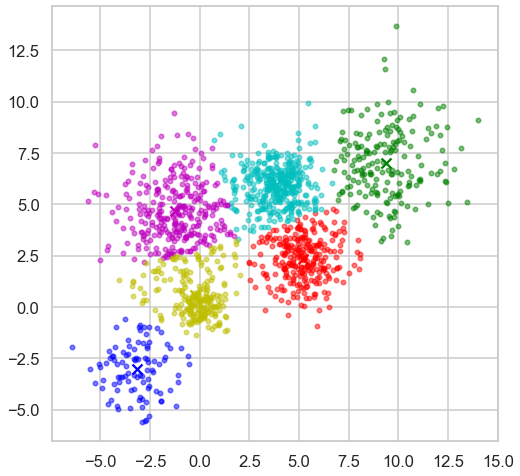

In [28]:
cluster_centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
num_classes = len(cluster_centers)
kmeans = KMeans(n_clusters=num_classes, init='k-means++')
kmeans.fit(Multi_blob_Data)
display_cluster(Multi_blob_Data,kmeans,num_clusters=num_classes)

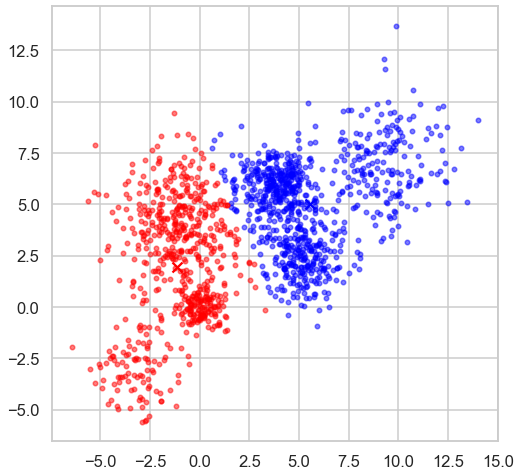

In [40]:
k=2
kmeans = KMeans(n_clusters=k, init='random')
kmeans.fit(Multi_blob_Data)
display_cluster(Multi_blob_Data,kmeans,num_clusters=k)
#print(kmeans.inertia_)

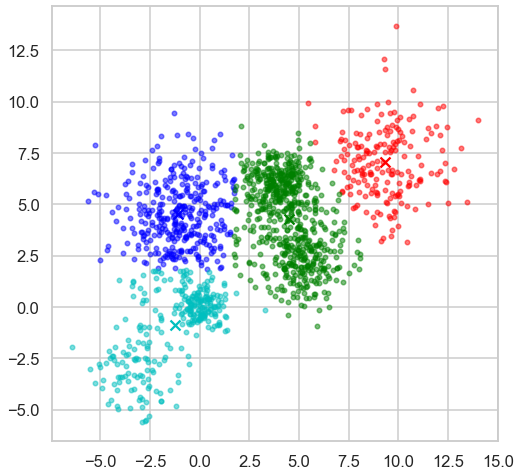

In [26]:
k=4
kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(Multi_blob_Data)
display_cluster(Multi_blob_Data,kmeans,num_clusters=k)


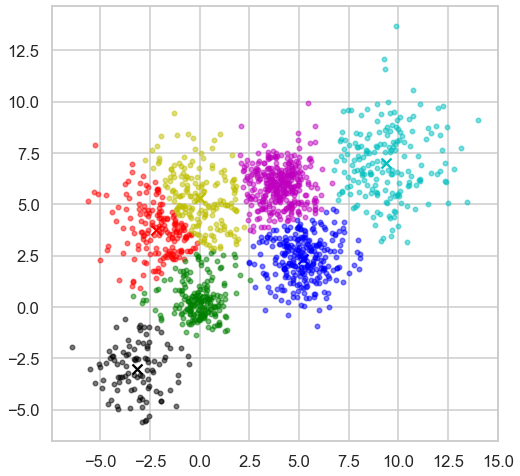

In [25]:
k=7
kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(Multi_blob_Data)
display_cluster(Multi_blob_Data,kmeans,num_clusters=k)


In [42]:
z=2
distortion1 = []
distortion2 = []
z_arr=[]
while z<=10:
    i=1
    while i<=100:
        kmeans = KMeans(n_clusters=z, init='random')
        kmeans.fit(Multi_blob_Data)
        distortion1.append(kmeans.inertia_)
        i=i+1
    distortion2.append(min(distortion1))
    z_arr.append(z)
    z=z+1
print(distortion2)    
print(z_arr)     
       

[16716.619175403433, 12094.797074229684, 7812.040522678243, 5600.217515342442, 4310.29690470677, 3811.057053398654, 3445.6419676203186, 3083.306656402559, 2827.5783244139197]
[2, 3, 4, 5, 6, 7, 8, 9, 10]


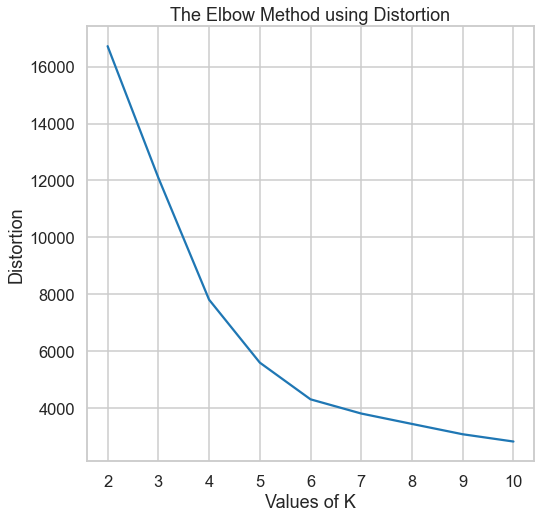

In [43]:
plt.plot(z_arr, distortion2)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [45]:
score = silhouette_score(Multi_blob_Data, kmeans.labels_, metric='euclidean')
score

0.3965954030084378

In [46]:
z=2
score=[]
z_arr=[]
while z<=10:
    kmeans = KMeans(n_clusters=z, init='random')
    kmeans.fit(Multi_blob_Data)
    score.append(silhouette_score(Multi_blob_Data, kmeans.labels_, metric='euclidean'))
    z_arr.append(z)
    z=z+1
print(score)    
print(z_arr)     
       

[0.4751544541991239, 0.43631793714185435, 0.4628725400351352, 0.48100602217073096, 0.4852844732625266, 0.463222898064336, 0.44324882890665845, 0.44679771073966174, 0.3976060282853616]
[2, 3, 4, 5, 6, 7, 8, 9, 10]


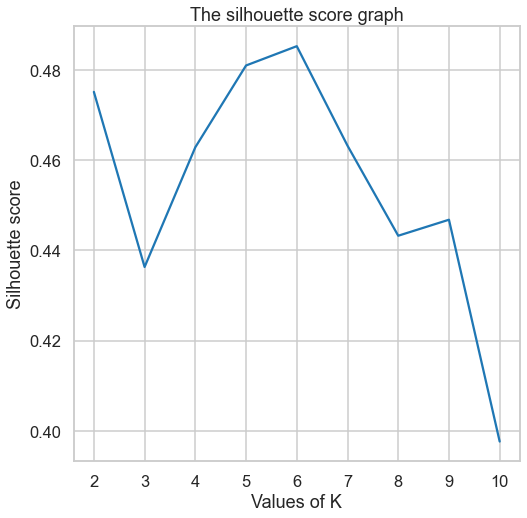

In [47]:
plt.plot(z_arr, score)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('The silhouette score graph')
plt.show()

In [217]:
# z=2
# score=[]
# z_arr=[]
# min_score=[]
# while z<=10:
#     i=1
#     while i<=100:
#         kmeans = KMeans(n_clusters=z, init='random')
#         kmeans.fit(Multi_blob_Data)
#         score.append(silhouette_score(Multi_blob_Data, kmeans.labels_, metric='euclidean'))
#         i=i+1
#     min_score.append(min(score))
#     z_arr.append(z)
#     z=z+1
# print(min_score)    
# print(z_arr)     
       

In [218]:
# plt.plot(z_arr, min_score)
# plt.xlabel('Values of K')
# plt.ylabel('Silhouette score')
# plt.title('The silhouette score graph')
# plt.show()

0.4862240839323367

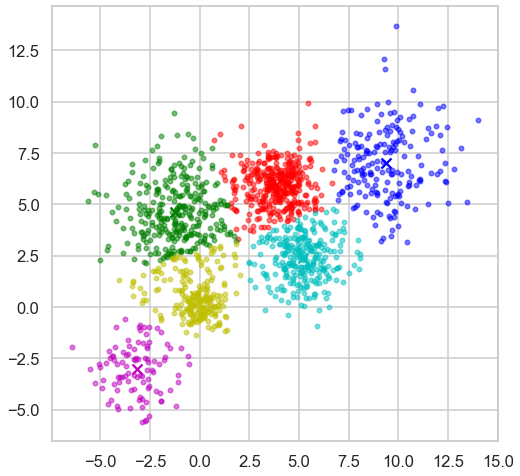

In [57]:
#The best value of k is at k=6 with the highest score"
k=6
kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(Multi_blob_Data)
display_cluster(Multi_blob_Data,kmeans,num_clusters=k)
score = silhouette_score(Multi_blob_Data, kmeans.labels_, metric='euclidean')
score

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

0.0876289177252096


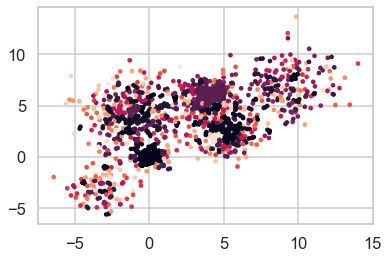

In [319]:
HC=AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='single', distance_threshold=0.2)
HC.fit(Multi_blob_Data)
HC_labels=HC.labels_
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=HC_labels, s=10);
score = silhouette_score(Multi_blob_Data, HC.labels_, metric='euclidean')
print(score)

<function matplotlib.pyplot.show(close=None, block=None)>

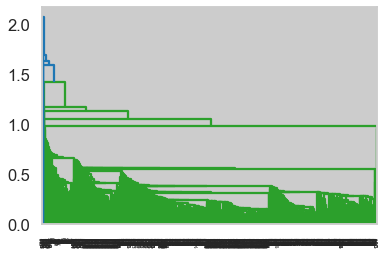

In [333]:
# linkage_array = ward(Multi_blob_Data)
# dendrogram(linkage_array)
dendrogram(linkage(Multi_blob_Data,method='single'))
plt.show

0.3155710172095083


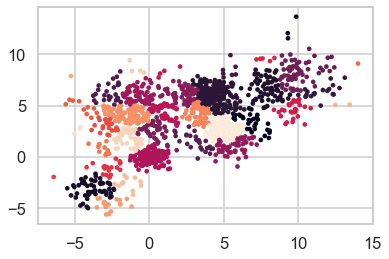

In [331]:
HC=AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='average', distance_threshold=2)
HC.fit(Multi_blob_Data)
HC_labels=HC.labels_
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=HC_labels, s=10);
score = silhouette_score(Multi_blob_Data, HC.labels_, metric='euclidean')
print(score)
#HC_labels=HC.labels
#dendrogram(linkage(Multi_blob_Data,method='single'))
#plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

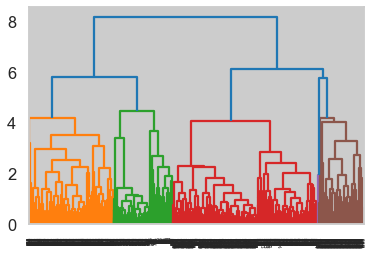

In [334]:
dendrogram(linkage(Multi_blob_Data,method='average'))
plt.show

0.08705564851389591


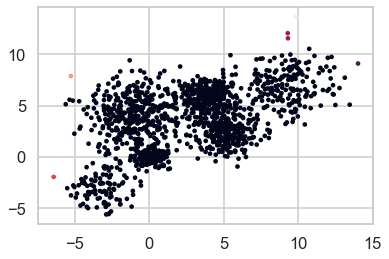

In [335]:
HC=AgglomerativeClustering(n_clusters=None, affinity='manhattan', linkage='single', distance_threshold=1.5)
HC.fit(Multi_blob_Data)
HC_labels=HC.labels_
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=HC_labels, s=10);
score = silhouette_score(Multi_blob_Data, HC.labels_, metric='euclidean')
print(score)
#dendrogram(linkage(Multi_blob_Data,method='single'))
#plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

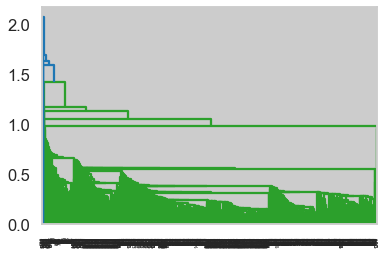

In [336]:
dendrogram(linkage(Multi_blob_Data,method='single'))
plt.show

0.2962118593103159


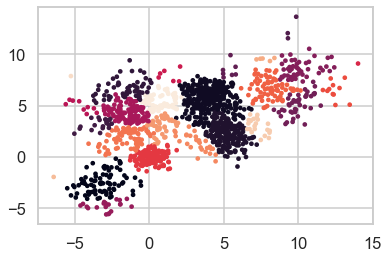

In [288]:
HC=AgglomerativeClustering(n_clusters=None, affinity='manhattan', linkage='average', distance_threshold=3)
HC.fit(Multi_blob_Data)
HC_labels=HC.labels_
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=HC_labels, s=10);
score = silhouette_score(Multi_blob_Data, HC.labels_, metric='euclidean')
print(score)

<function matplotlib.pyplot.show(close=None, block=None)>

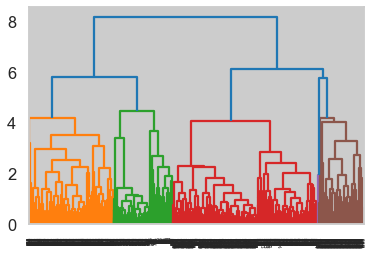

In [337]:
dendrogram(linkage(Multi_blob_Data,method='average'))
plt.show

0.040594337326923476


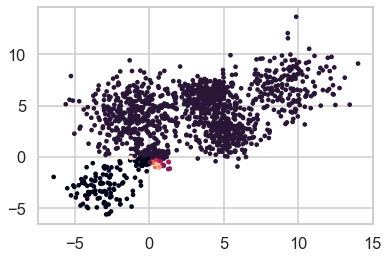

In [327]:
HC=AgglomerativeClustering(n_clusters=None, affinity='cosine', linkage='single', distance_threshold=0.002)
HC.fit(Multi_blob_Data)
HC_labels=HC.labels_
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=HC_labels, s=10);
score = silhouette_score(Multi_blob_Data, HC.labels_, metric='euclidean')
print(score)
#temp = hierarchy.linkage(HC_labels, 'single')
#dendrogram(temp)
#plt.show

In [ ]:
dendrogram(linkage(Multi_blob_Data,method='single'))
plt.show

0.28022113778340446


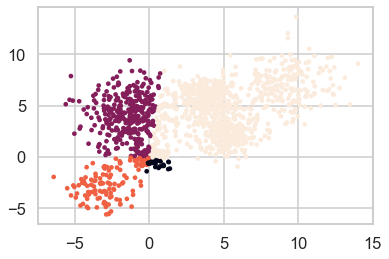

In [328]:
HC=AgglomerativeClustering(n_clusters=None, affinity='cosine', linkage='average', distance_threshold=0.5)
HC.fit(Multi_blob_Data)
HC_labels=HC.labels_
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=HC_labels, s=10);
score = silhouette_score(Multi_blob_Data, HC.labels_, metric='euclidean')
print(score)


<function matplotlib.pyplot.show(close=None, block=None)>

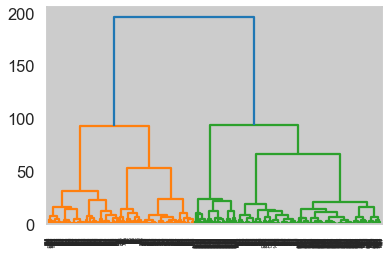

In [338]:
dendrogram(linkage(Multi_blob_Data,method='ward'))
plt.show

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

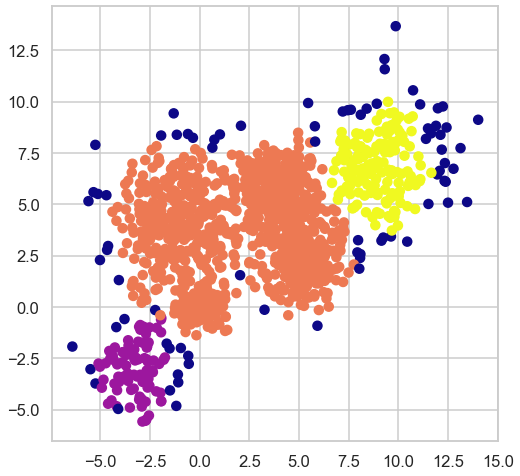

In [5]:
db=DBSCAN(eps=0.8, min_samples=10)
db.fit(Multi_blob_Data)
labels=db.labels_
##score=silhouette_score(Multi_blob_Data, labels, metric='euclidean')
#print(score)
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.show() # showing the plot

0.2


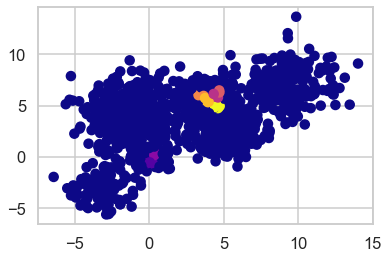

0.4


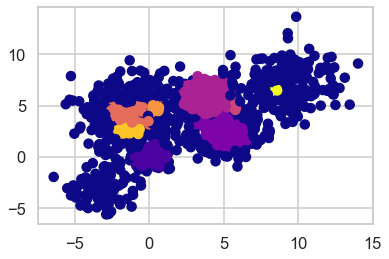

0.6000000000000001


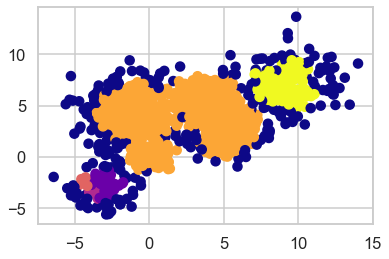

0.8


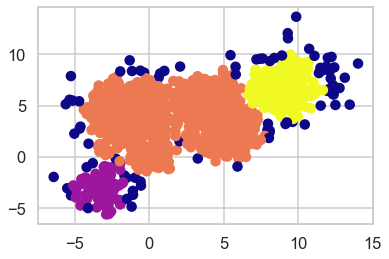

1.0


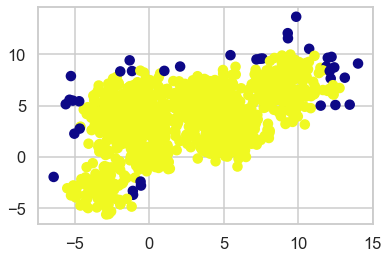

1.2


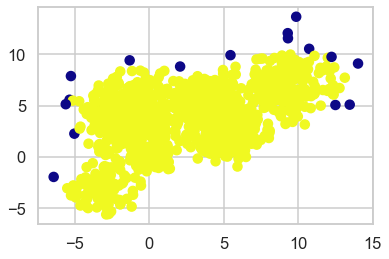

1.4


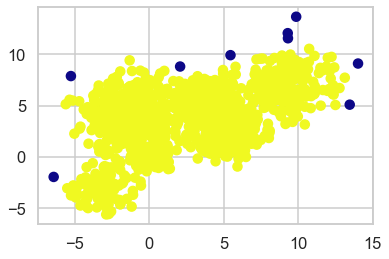

1.5999999999999999


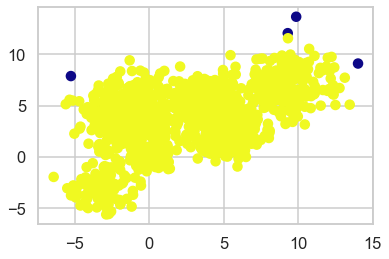

1.7999999999999998


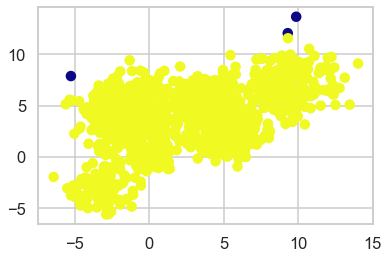

1.9999999999999998


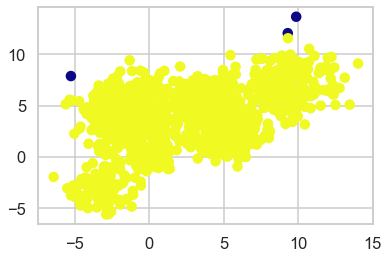

In [88]:
epss=0.2
score=[]
eps_plt=[]
while epss<2:
    db=DBSCAN(eps=epss, min_samples=10)
    db.fit(Multi_blob_Data)
    labels=db.labels_
    score.append(silhouette_score(Multi_blob_Data, labels, metric='euclidean'))
    print(epss)
    
    plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:,1], c = labels, cmap= "plasma") # plotting the clusters
    plt.show()
    eps_plt.append(epss)
    epss=epss+0.2

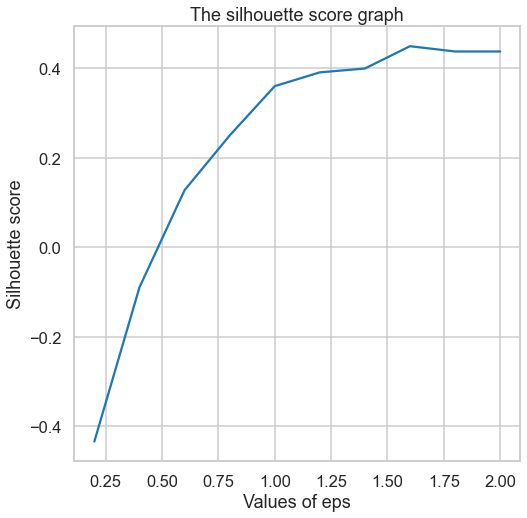

In [23]:
plt.plot(eps_plt, score)
plt.xlabel('Values of eps')
plt.ylabel('Silhouette score')
plt.title('The silhouette score graph')
plt.show()

5


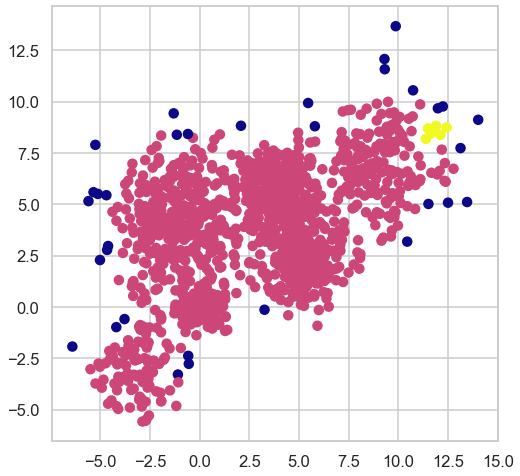

7


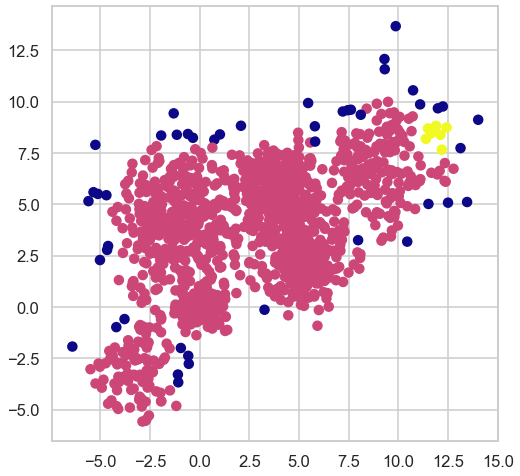

9


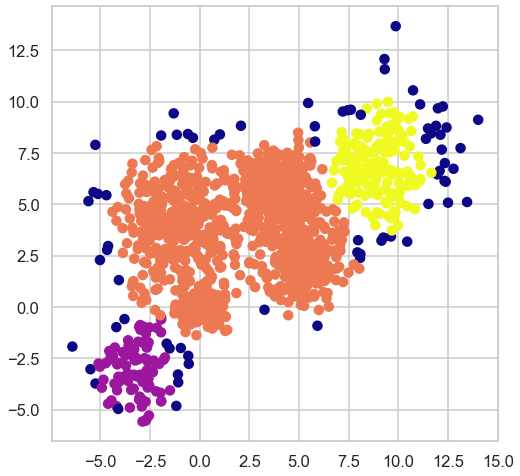

11


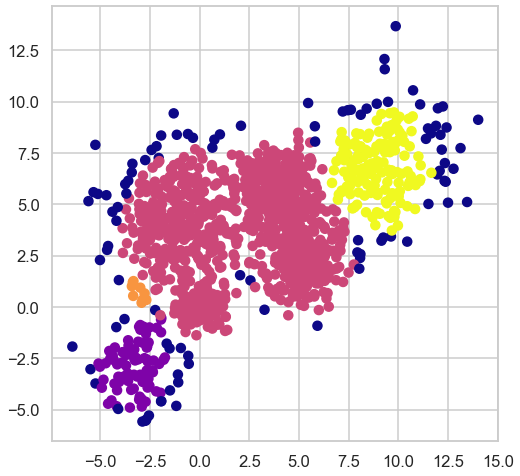

13


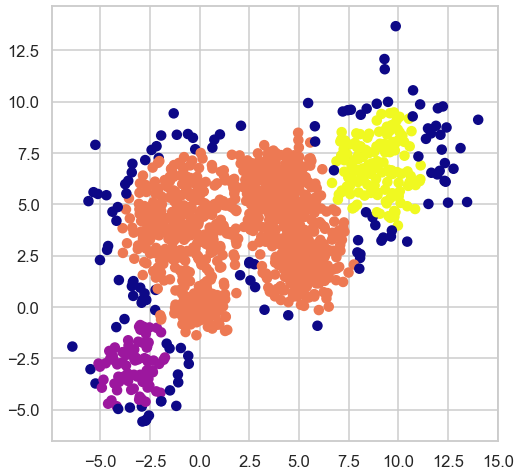

15


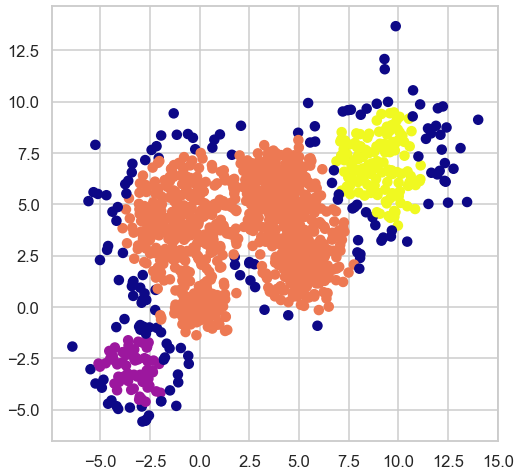

17


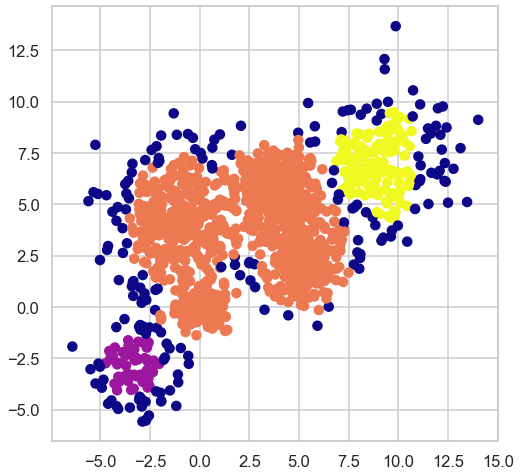

19


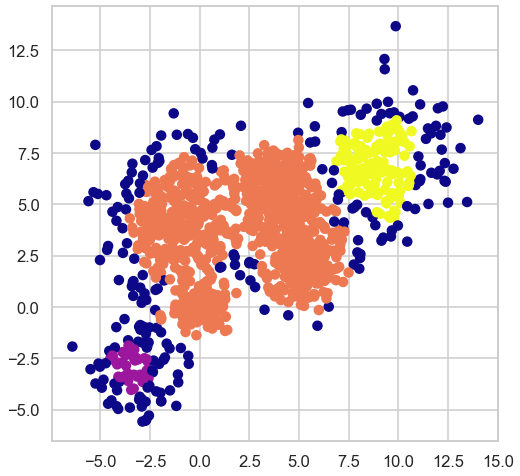

21


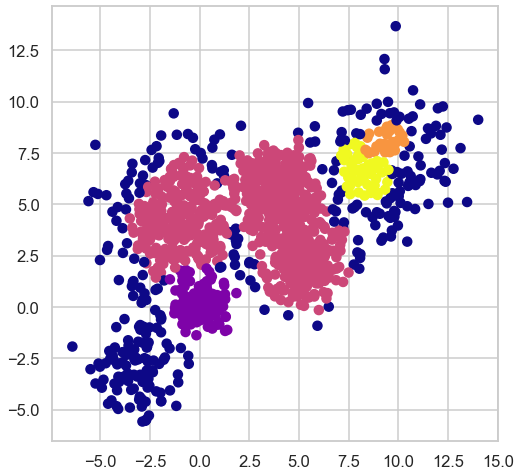

23


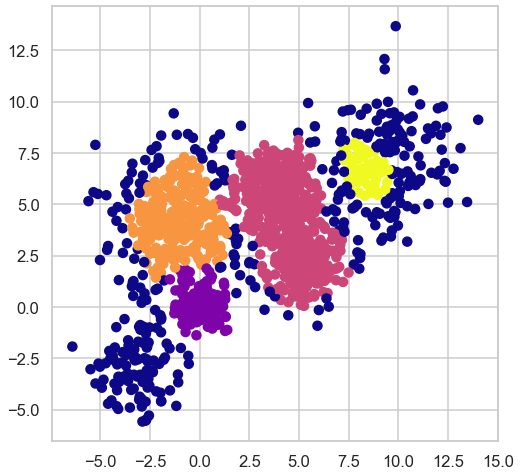

25


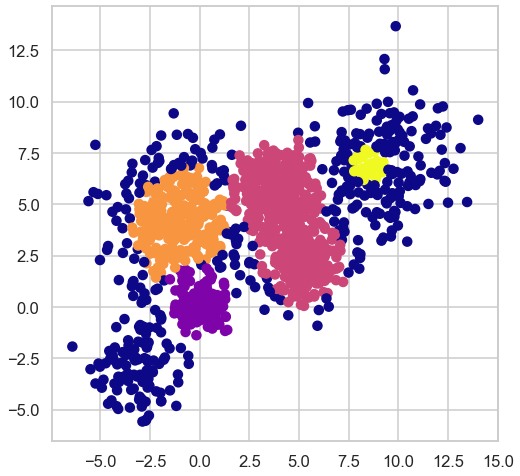

In [24]:
samples=5
score=[]
samples_plt=[]
while samples<=25:
    db=DBSCAN(eps=0.8, min_samples=samples)
    db.fit(Multi_blob_Data)
    labels=db.labels_
    score.append(silhouette_score(Multi_blob_Data, labels, metric='euclidean'))
    print(samples)
    plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:,1], c = labels, cmap= "plasma") # plotting the clusters
    plt.show() 
    samples_plt.append(samples)
    samples=samples+2

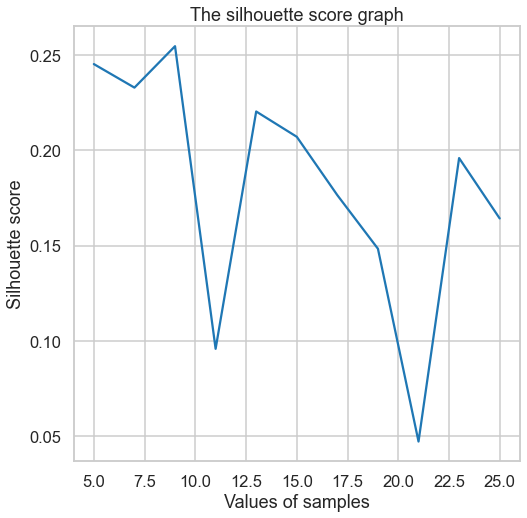

In [25]:
plt.plot(samples_plt, score)
plt.xlabel('Values of samples')
plt.ylabel('Silhouette score')
plt.title('The silhouette score graph')
plt.show()

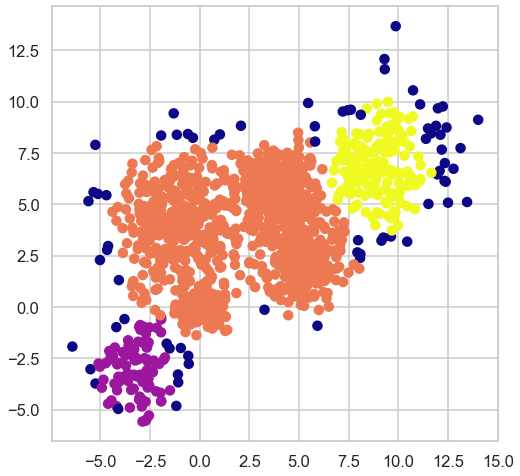

In [34]:
#The best value of eps is at eps=1.625 with the highest score
#The best value of samples is at samples=9 with the highest score
db=DBSCAN(eps=0.8, min_samples=9)
db.fit(Multi_blob_Data)
labels=db.labels_
score=silhouette_score(Multi_blob_Data, labels, metric='euclidean')
#print(score)
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.show()

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [5]:
# import matplotlib.mlab as mlab
# def plot_contours(data, means, covs, title):
#     plt.figure()
#     plt.plot([x[0] for x in data], [y[1] for y in data],'ko') # data

#     delta = 0.025
#     k = len(means)
#     x = np.arange(-2.0, 7.0, delta)
#     y = np.arange(-2.0, 7.0, delta)
#     X, Y = np.meshgrid(x, y)
#     col = ['green', 'red', 'indigo']
#     for i in range(k):
#         mean = means[i]
#         cov = covs[i]
#         sigmax = np.sqrt(cov[0][0])
#         sigmay = np.sqrt(cov[1][1])
#         sigmaxy = cov[0][1]/(sigmax*sigmay)
#         Z = mlab.bivariate_normal(X, Y, sigmax, sigmay, mean[0], mean[1], sigmaxy)
#         plt.contour(X, Y, Z, colors = col[i])
#         plt.title(title)
#     plt.rcParams.update({'font.size':16})
#     plt.tight_layout()


[[0.242 0.255 0.236 0.267]
 [0.249 0.254 0.24  0.257]
 [0.241 0.255 0.234 0.269]
 [0.247 0.253 0.24  0.26 ]
 [0.244 0.255 0.237 0.264]]


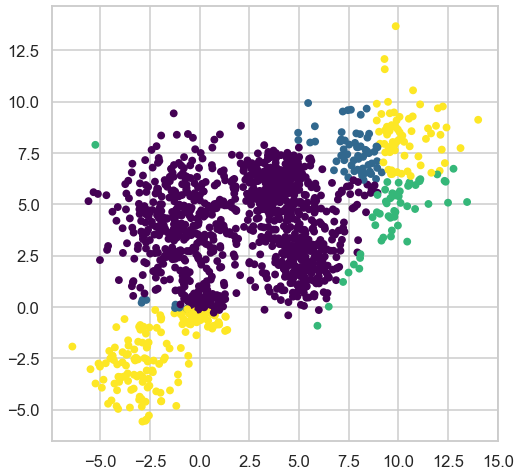

In [6]:
GM=GaussianMixture(n_components=4, covariance_type='full', init_params='random')
GM.fit(Multi_blob_Data)
labels = GM.predict(Multi_blob_Data)
probs = GM.predict_proba(Multi_blob_Data)
print(probs[:5].round(3))
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, s=40, cmap='viridis');

In [13]:
# chosen = np.random.choice(len(Multi_blob_Data), 3, replace=False)
# initial_means = [Multi_blob_Data[x] for x in chosen]
# initial_covs = [np.cov(Multi_blob_Data, rowvar=0)] * 3
# plot_contours(Multi_blob_Data, initial_means, initial_covs, 'Initial clusters')

[[0.998 0.    0.    0.002]
 [0.965 0.    0.    0.035]
 [0.998 0.    0.    0.002]
 [0.987 0.    0.    0.013]
 [0.994 0.    0.    0.006]]


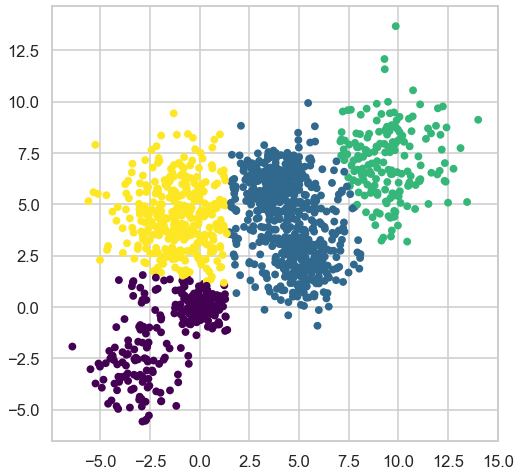

In [19]:
GM=GaussianMixture(n_components=4, covariance_type='tied', init_params='kmeans')
GM.fit(Multi_blob_Data)
labels = GM.predict(Multi_blob_Data)
probs = GM.predict_proba(Multi_blob_Data)
print(probs[:5].round(3))
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, s=40, cmap='viridis');

[[0.283 0.283 0.223 0.21 ]
 [0.274 0.268 0.234 0.223]
 [0.284 0.287 0.221 0.208]
 [0.277 0.272 0.231 0.22 ]
 [0.28  0.28  0.226 0.214]]


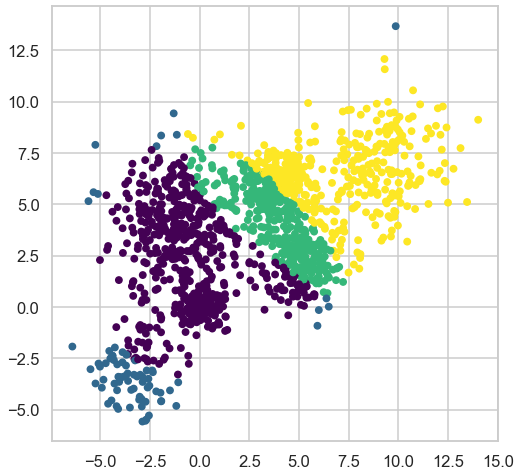

In [15]:
GM=GaussianMixture(n_components=4, covariance_type='diag', init_params='random')
GM.fit(Multi_blob_Data)
labels = GM.predict(Multi_blob_Data)
probs = GM.predict_proba(Multi_blob_Data)
print(probs[:5].round(3))
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, s=40, cmap='viridis');

[[0.000e+00 0.000e+00 0.000e+00 1.000e+00]
 [2.500e-03 0.000e+00 1.000e-04 9.975e-01]
 [0.000e+00 0.000e+00 0.000e+00 1.000e+00]
 [3.000e-04 0.000e+00 1.000e-04 9.996e-01]
 [1.000e-04 0.000e+00 0.000e+00 9.999e-01]]


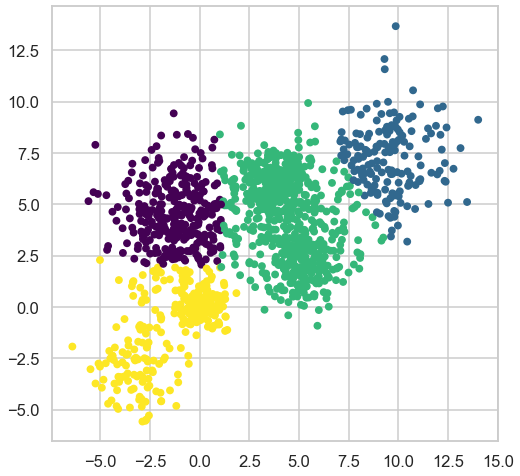

In [17]:
GM=GaussianMixture(n_components=4, covariance_type='spherical',init_params='kmeans')
GM.fit(Multi_blob_Data)
labels = GM.predict(Multi_blob_Data)
probs = GM.predict_proba(Multi_blob_Data)
print(probs[:5].round(4))
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, s=40, cmap='viridis');

In [ ]:
#The best covariance type is the spherical with the lowest probabilty

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [10]:
from sklearn.datasets import load_iris
iris_data = load_iris()
print(iris_data.target[[10, 25, 50]])
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


[0 0 1]


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

In [13]:
#print(iris_data)
#iris_dp=pd.DataFrame(iris_data)

df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

df["setosa"] = iris_data.target[10]
df["versicolor"] = iris_data.target[25]
df["virginica"] = iris_data.target[50]


df.head()


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   setosa  versicolor  virginica  
0       0           0          1  
1       0           0          1  
2       0           0          1  
3       0           0          1  
4       0           0          1

In [65]:
x = df.iloc[:, [0, 1, 2, 3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [176]:
#BEFORE NORMALIZATION

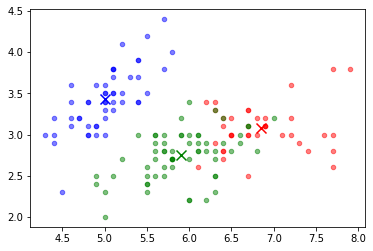

In [137]:
#kmeans
k=3
kmeans = KMeans(n_clusters=k, init='random')
kmeans.fit(x)
display_cluster(x,kmeans,num_clusters=k)

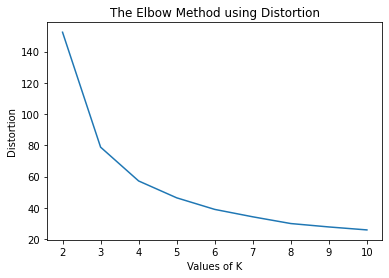

In [138]:
z=2
distortion1 = []
distortion2 = []
z_arr=[]
while z<=10:
    i=1
    while i<=100:
        kmeans = KMeans(n_clusters=z, init='random')
        kmeans.fit(x)
        distortion1.append(kmeans.inertia_)
        i=i+1
    distortion2.append(min(distortion1))
    z_arr.append(z)
    z=z+1
#print(distortion2)    
#print(z_arr) 
plt.plot(z_arr, distortion2)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

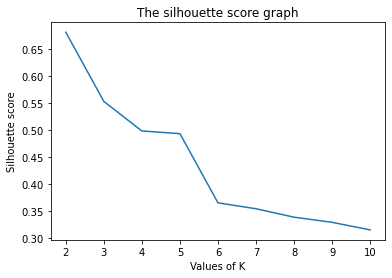

In [139]:
z=2
score=[]
z_arr=[]
while z<=10:
    kmeans = KMeans(n_clusters=z, init='random')
    kmeans.fit(x)
    score.append(silhouette_score(x, kmeans.labels_, metric='euclidean'))
    z_arr.append(z)
    z=z+1
#print(score)    
#print(z_arr)
plt.plot(z_arr, score)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('The silhouette score graph')
plt.show()

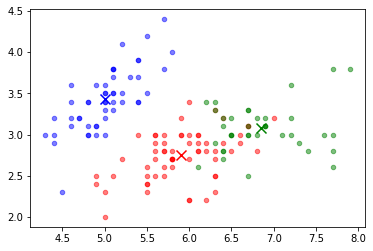

In [142]:
#The best values for the Kmeans are K=3 not the highest score but the best with the elbow method in considiration
k=3
kmeans = KMeans(n_clusters=k, init='random')
kmeans.fit(x)
display_cluster(x,kmeans,num_clusters=k)

The silhouette score of cosine average 0.553807892204499
The silhouette score of cosine single 0.553807892204499
The silhouette score of euclidean average 0.5541608580282847
The silhouette score of euclidean single 0.5121107753649304
The silhouette score of manhattan average 0.5535372928319976
The silhouette score of manhattan single 0.34029603418948795


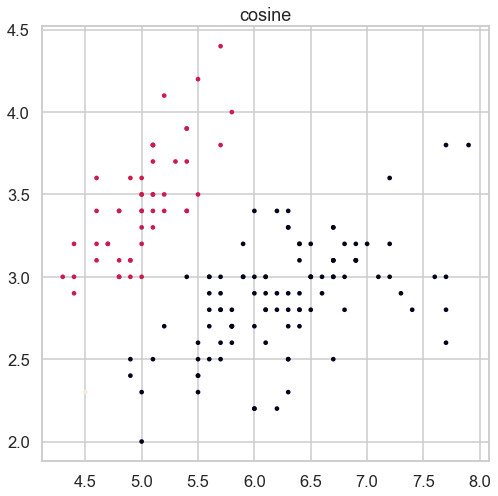

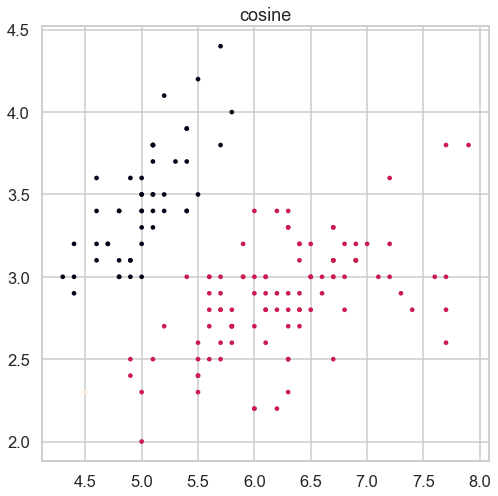

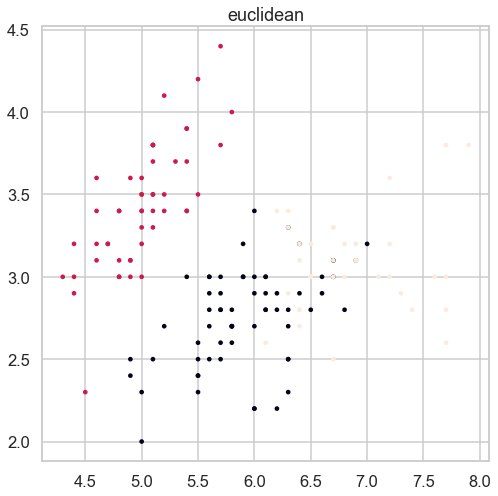

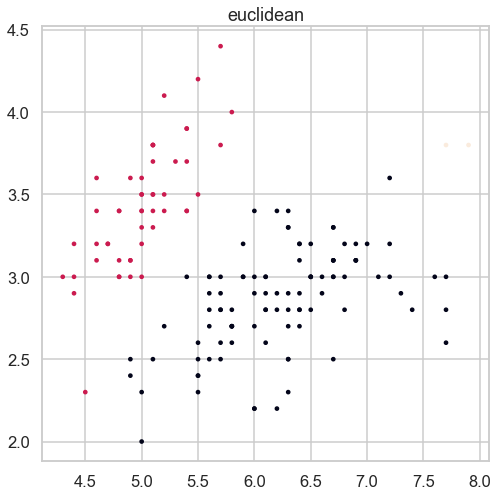

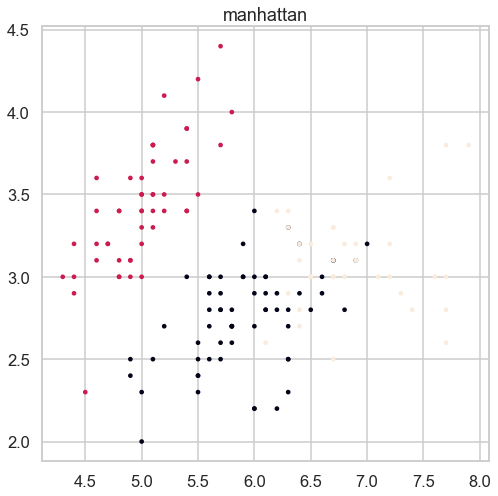

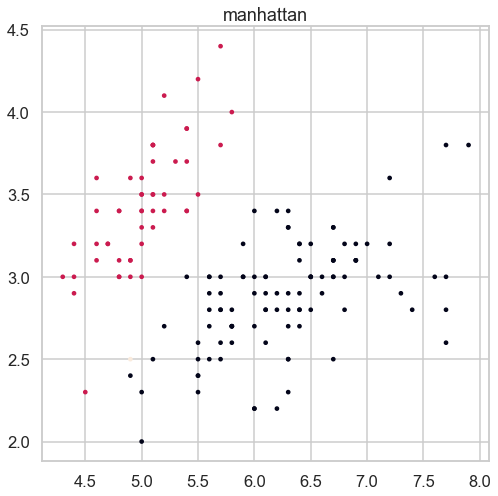

In [69]:
#HC
affinity=['cosine','euclidean','manhattan']
linkage=['average','single']
for i in affinity:
    for z in linkage:
        HC=AgglomerativeClustering(n_clusters=3, affinity=i, linkage=z, distance_threshold=None)
        HC.fit(x)
        HC_labels=HC.labels_
        plt.figure()
        plt.title(i)
        plt.scatter(x[:, 0], x[:, 1], c=HC_labels, s=10);
        score = silhouette_score(x, HC.labels_, metric='euclidean')
        print('The silhouette score of',i,z,score)


In [ ]:
# The best model is euclidean average with the highest silhoutte score

<function matplotlib.pyplot.show(close=None, block=None)>

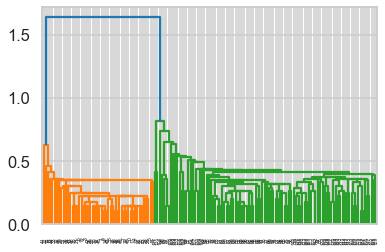

In [73]:
dendrogram(linkage(x,method='single'))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

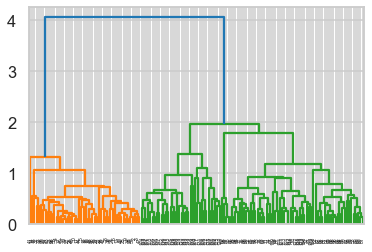

In [74]:
dendrogram(linkage(x,method='average'))
plt.show

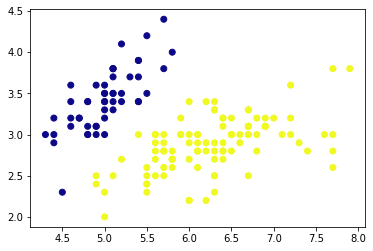

In [162]:
#dbscan
db=DBSCAN(eps=1.6, min_samples=7)
db.fit(x)
labels=db.labels_
##score=silhouette_score(Multi_blob_Data, labels, metric='euclidean')
#print(score)
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.show()

0.2


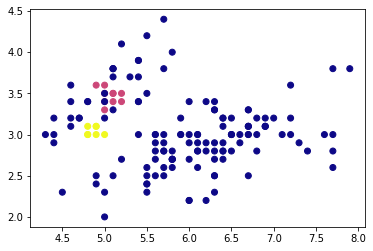

0.30000000000000004


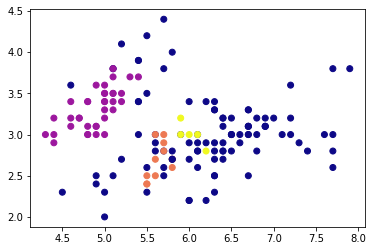

0.4


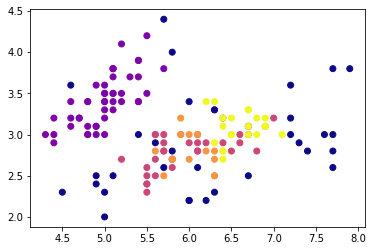

0.5


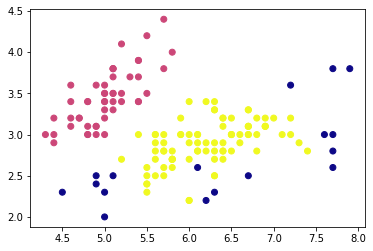

0.6


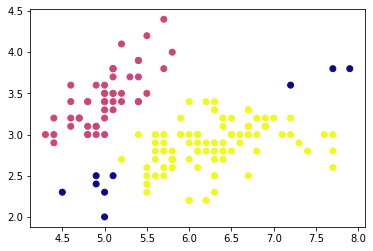

0.7


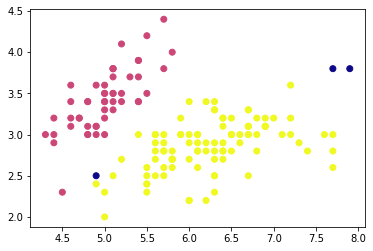

0.7999999999999999


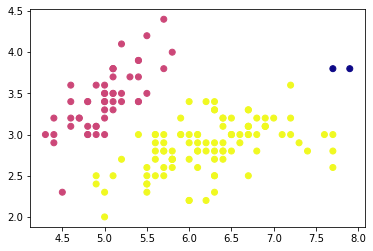

0.8999999999999999


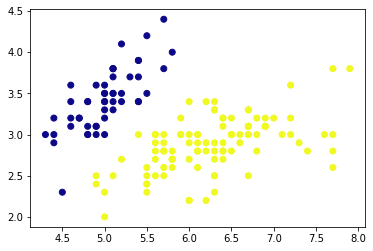

0.9999999999999999


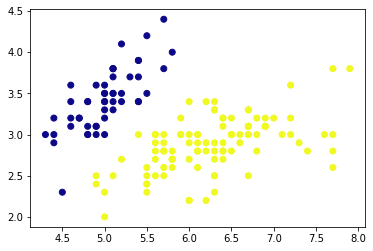

1.0999999999999999


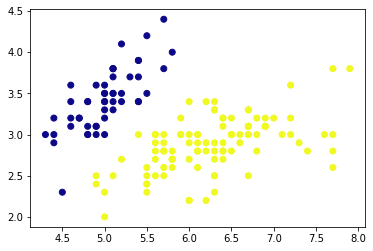

1.2


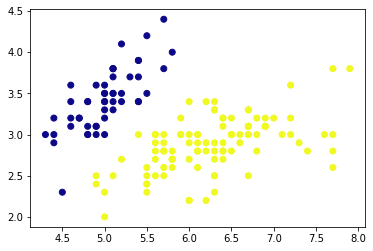

1.3


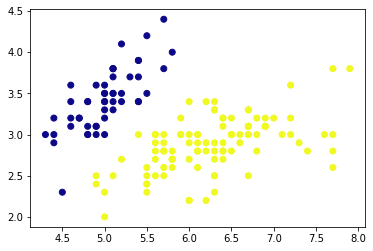

1.4000000000000001


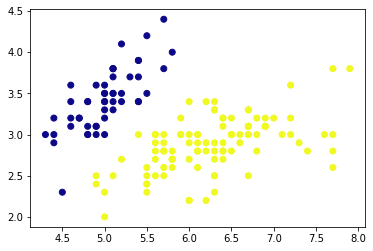

1.5000000000000002


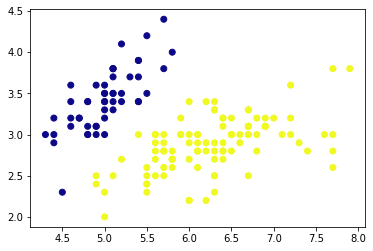

1.6000000000000003


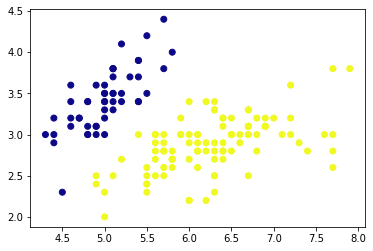

In [173]:
epss=0.2
score=[]
eps_plt=[]
while epss<1.7:
    db=DBSCAN(eps=epss, min_samples=5)
    db.fit(x)
    labels=db.labels_
    score.append(silhouette_score(x, labels, metric='euclidean'))
    print(epss)
    plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
    plt.show()
    eps_plt.append(epss)
    epss=epss+0.1

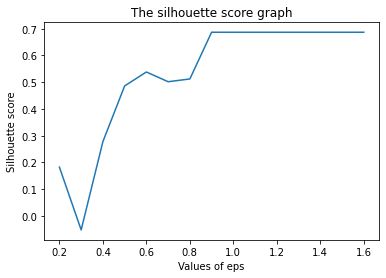

In [174]:
plt.plot(eps_plt, score)
plt.xlabel('Values of eps')
plt.ylabel('Silhouette score')
plt.title('The silhouette score graph')
plt.show()

5


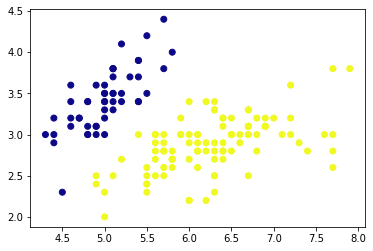

6


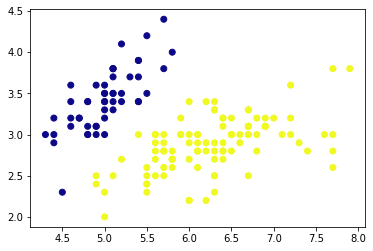

7


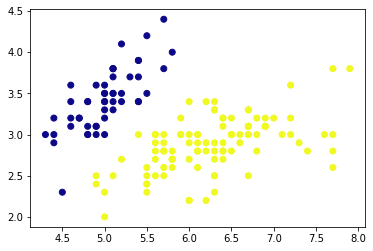

8


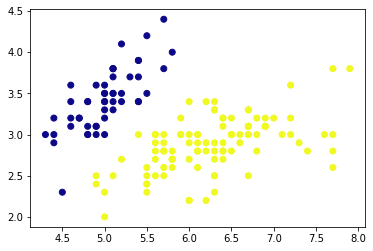

9


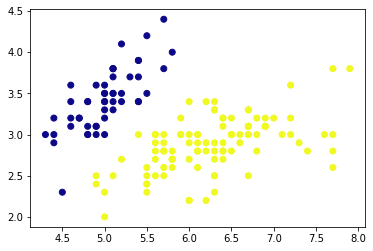

10


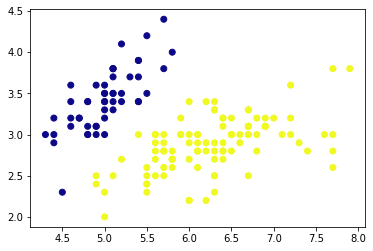

11


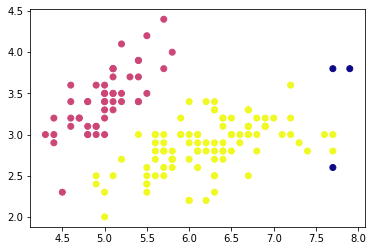

12


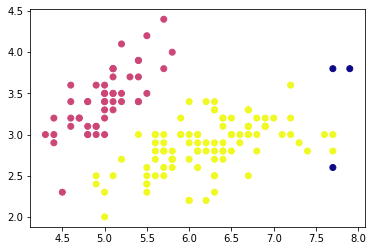

13


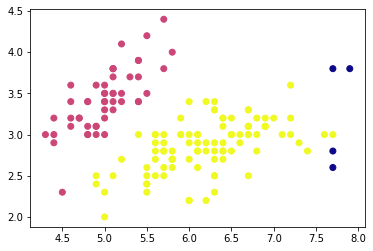

14


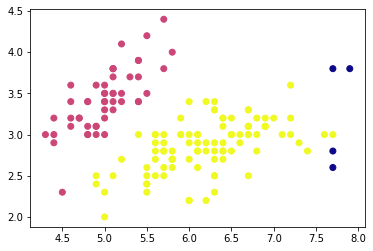

15


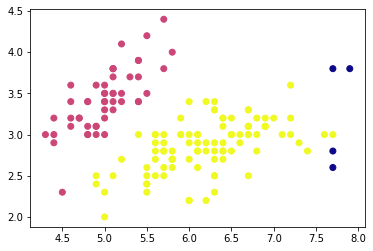

16


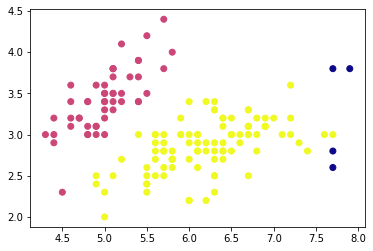

17


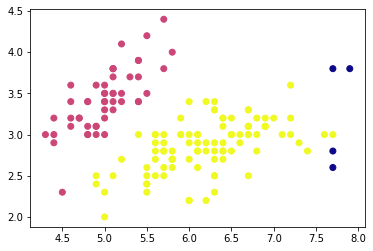

18


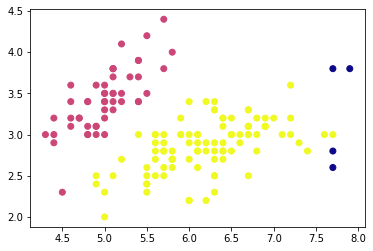

19


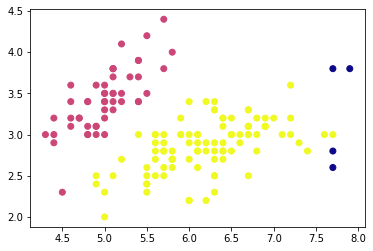

20


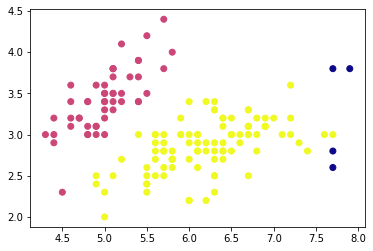

21


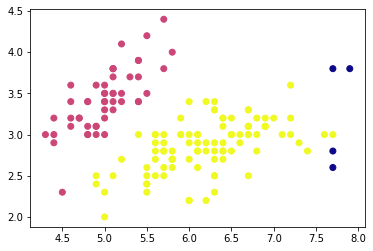

22


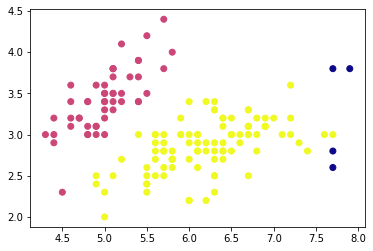

23


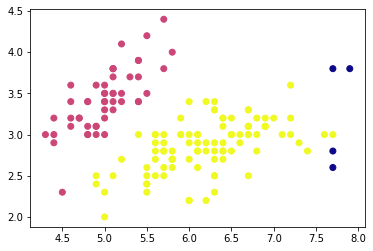

24


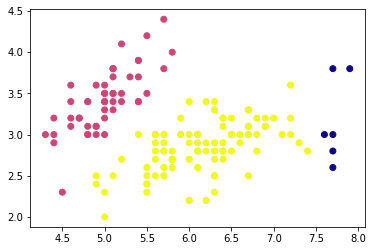

25


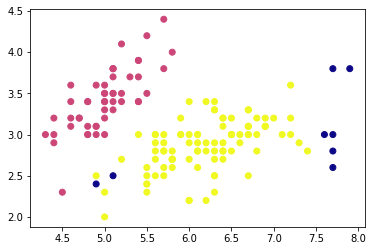

In [166]:
samples=5
score=[]
samples_plt=[]
while samples<=25:
    db=DBSCAN(eps=0.9, min_samples=samples)
    db.fit(x)
    labels=db.labels_
    score.append(silhouette_score(x, labels, metric='euclidean'))
    print(samples)
    plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
    plt.show() 
    samples_plt.append(samples)
    samples=samples+1

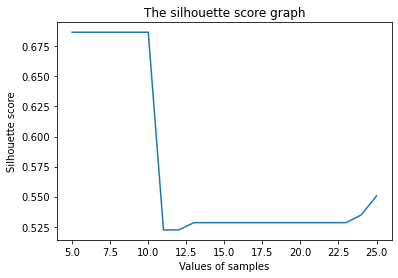

In [167]:
plt.plot(samples_plt, score)
plt.xlabel('Values of samples')
plt.ylabel('Silhouette score')
plt.title('The silhouette score graph')
plt.show()

0.6867350732769776


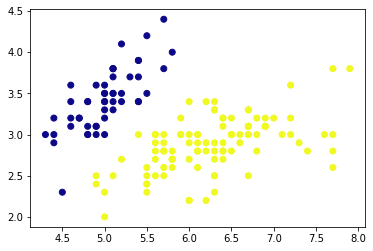

In [175]:
#the best number of samples is 10 with eps=0.9 

db=DBSCAN(eps=0.9, min_samples=10)
db.fit(x)
labels=db.labels_
score=silhouette_score(x, labels, metric='euclidean')
print(score)
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.show()

probabilty of spherical [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
probabilty of diag [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
probabilty of tied [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
probabilty of full [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


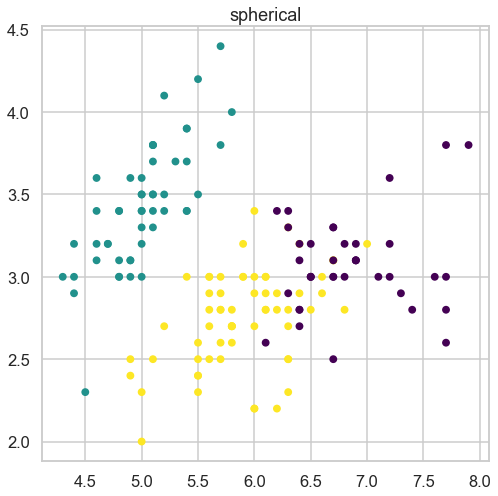

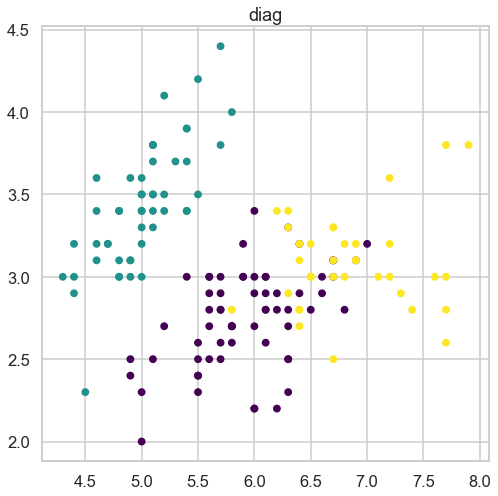

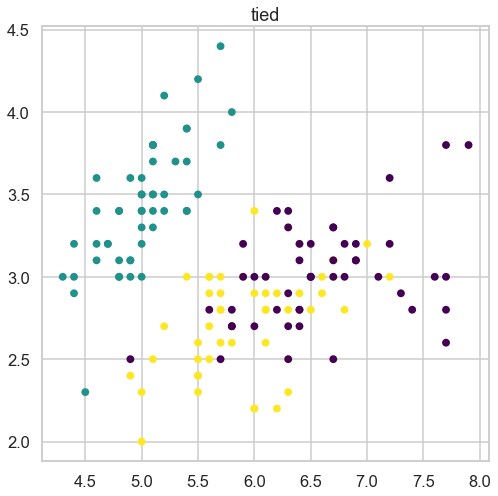

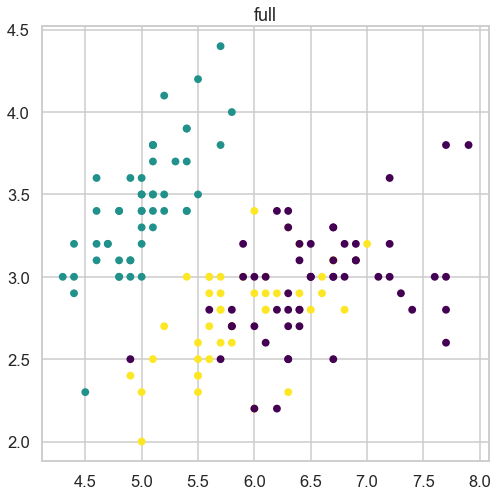

In [33]:
#Gaussian
cov_type=["spherical", "diag", "tied", "full"]


for i in cov_type:
    GM=GaussianMixture(n_components=3, covariance_type=i,init_params='kmeans')
    GM.fit(x)
    labels = GM.predict(x)
    probs = GM.predict_proba(x)
    print("probabilty of",i,probs[:5].round(9))
    plt.figure()
    plt.title(i)
    plt.scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='viridis');
    plt.show
#the best covariance type is spherical

In [ ]:
#AFTER NORMALIZATION

In [75]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler ,MaxAbsScaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(df)

# transform train and test sets
df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   setosa  versicolor  virginica  
0     0.0         0.0        0.0  
1     0.0         0.0        0.0  
2     0.0         0.0        0.0  
3     0.0         0.0        0.0  
4     0.0         0.0        0.0

In [83]:
x = df_scaled.iloc[:, [0, 1, 2, 3]].values

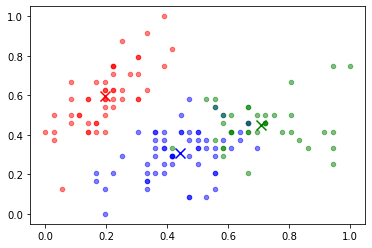

In [185]:
#kmeans
k=3
kmeans = KMeans(n_clusters=k, init='random')
kmeans.fit(x)
display_cluster(x,kmeans,num_clusters=k)

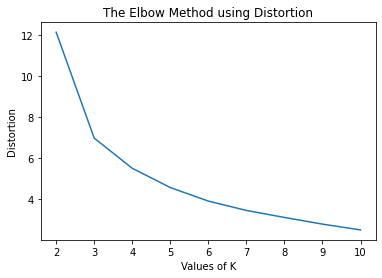

In [186]:
z=2
distortion1 = []
distortion2 = []
z_arr=[]
while z<=10:
    i=1
    while i<=100:
        kmeans = KMeans(n_clusters=z, init='random')
        kmeans.fit(x)
        distortion1.append(kmeans.inertia_)
        i=i+1
    distortion2.append(min(distortion1))
    z_arr.append(z)
    z=z+1
#print(distortion2)    
#print(z_arr) 
plt.plot(z_arr, distortion2)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

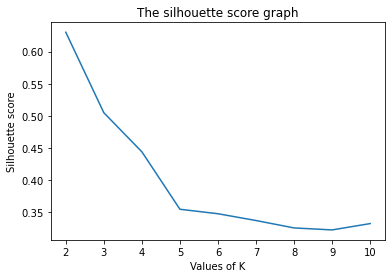

In [187]:
z=2
score=[]
z_arr=[]
while z<=10:
    kmeans = KMeans(n_clusters=z, init='random')
    kmeans.fit(x)
    score.append(silhouette_score(x, kmeans.labels_, metric='euclidean'))
    z_arr.append(z)
    z=z+1
#print(score)    
#print(z_arr)
plt.plot(z_arr, score)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('The silhouette score graph')
plt.show()

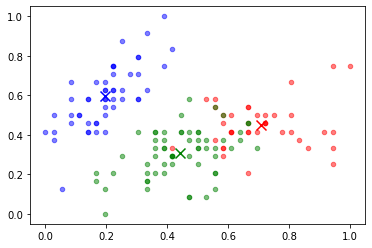

In [188]:
#The best values for the Kmeans are K=3 not the highest score but the best with the elbow method in considiration
k=3
kmeans = KMeans(n_clusters=k, init='random')
kmeans.fit(x)
display_cluster(x,kmeans,num_clusters=k)

The silhouette score of cosine average 0.3753699354616367
The silhouette score of cosine single 0.3753699354616367
The silhouette score of euclidean average 0.42411008000074957
The silhouette score of euclidean single 0.38970438475262115
The silhouette score of manhattan average 0.4688243259161771
The silhouette score of manhattan single 0.28175297467775057


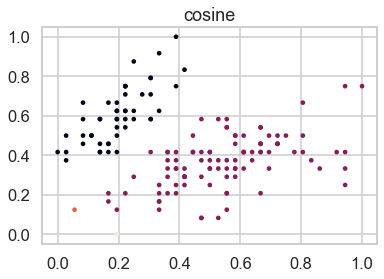

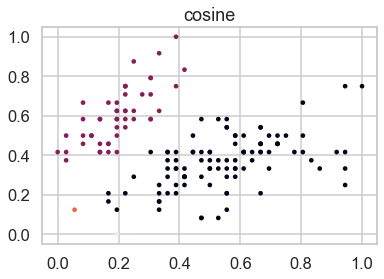

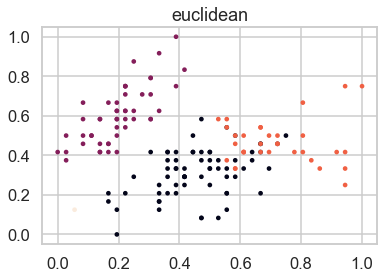

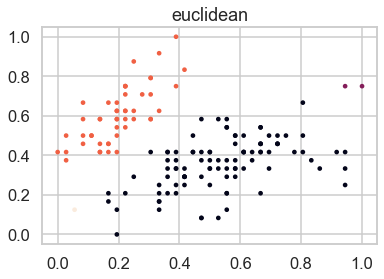

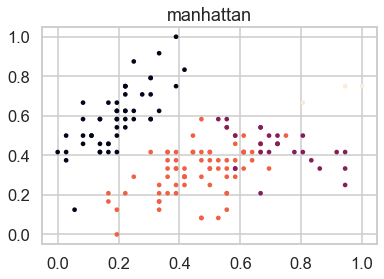

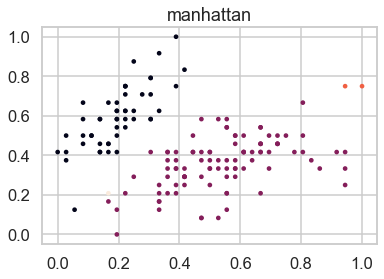

In [80]:
#HC
affinity=['cosine','euclidean','manhattan']
linkage=['average','single']
for i in affinity:
    for z in linkage:
        HC=AgglomerativeClustering(n_clusters=4, affinity=i, linkage=z, distance_threshold=None)
        HC.fit(x)
        HC_labels=HC.labels_
        plt.figure()
        plt.title(i)
        plt.scatter(x[:, 0], x[:, 1], c=HC_labels, s=10);
        score = silhouette_score(x, HC.labels_, metric='euclidean')
        print('The silhouette score of',i,z,score)


In [ ]:
#The best model is manhattan average with the highest score 0.46

<function matplotlib.pyplot.show(close=None, block=None)>

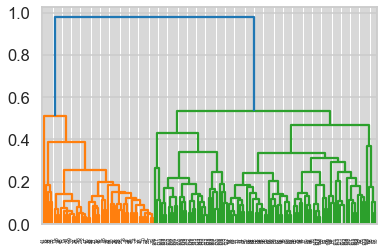

In [86]:
dendrogram(linkage(x,method='average'))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

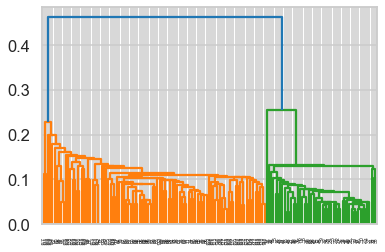

In [87]:
dendrogram(linkage(x,method='single'))
plt.show

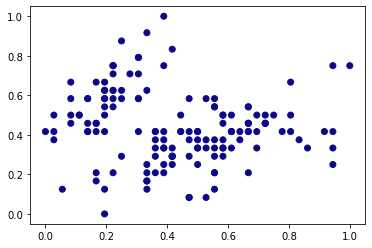

In [211]:
#DBSCAN
db=DBSCAN(eps=0.6, min_samples=8)
db.fit(x)
labels=db.labels_
##score=silhouette_score(Multi_blob_Data, labels, metric='euclidean')
#print(score)
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.show()

0.1


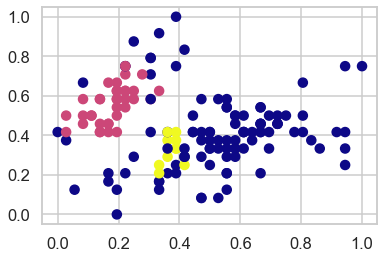

0.2


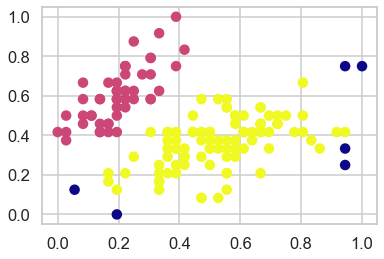

0.30000000000000004


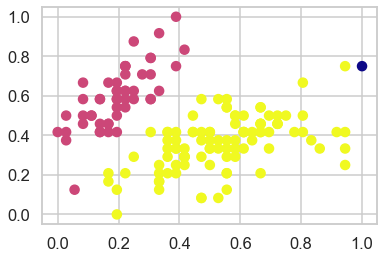

0.4


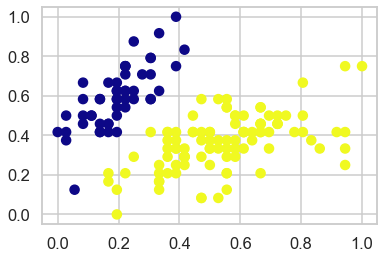

In [90]:
epss=0.1
score=[]
eps_plt=[]
while epss<0.5:
    db=DBSCAN(eps=epss, min_samples=8)
    db.fit(x)
    labels=db.labels_
    score.append(silhouette_score(x, labels, metric='euclidean'))
    print(epss)
    plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
    plt.show()
    eps_plt.append(epss)
    epss=epss+0.1

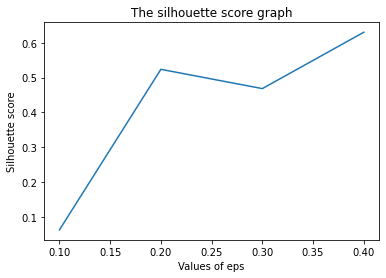

In [213]:
plt.plot(eps_plt, score)
plt.xlabel('Values of eps')
plt.ylabel('Silhouette score')
plt.title('The silhouette score graph')
plt.show()

5


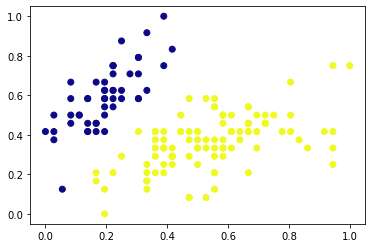

6


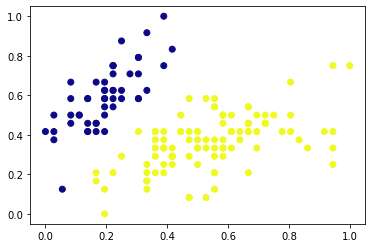

7


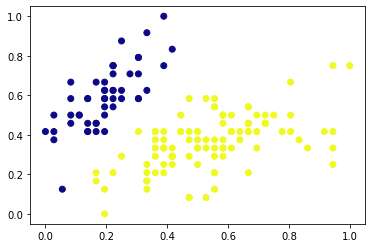

8


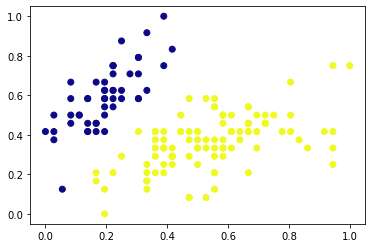

9


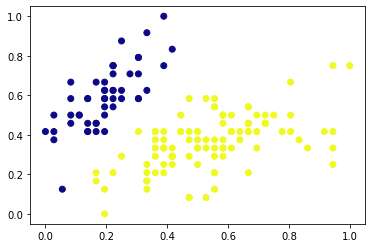

10


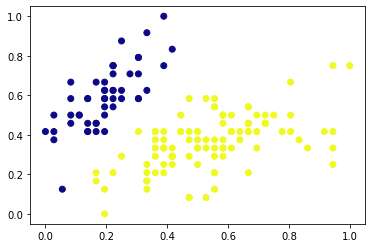

11


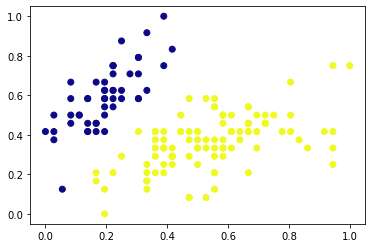

12


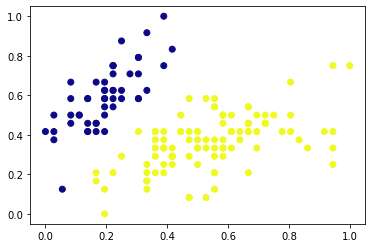

13


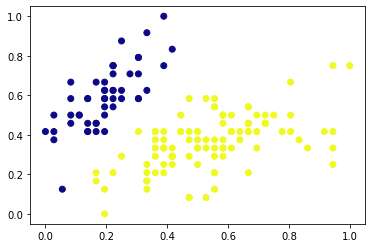

14


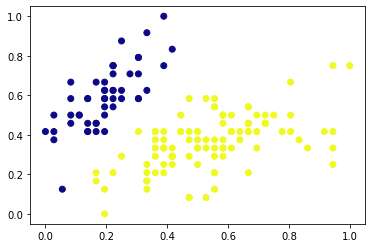

15


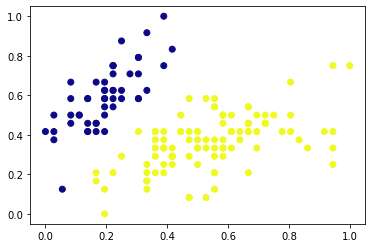

16


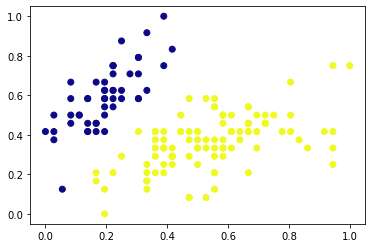

17


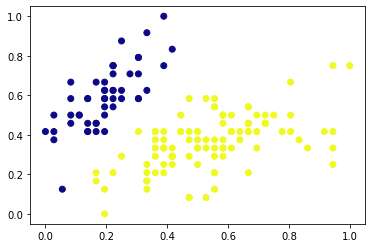

18


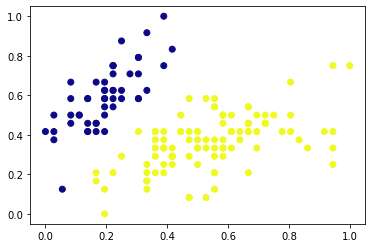

19


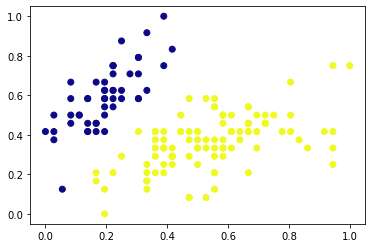

20


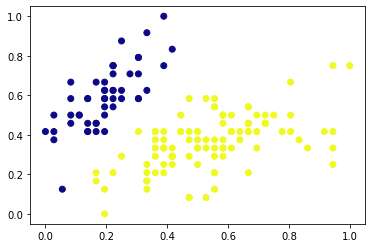

21


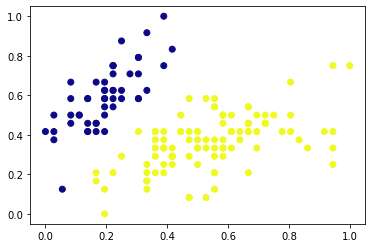

22


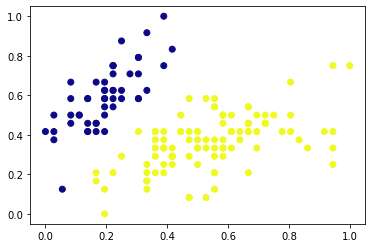

23


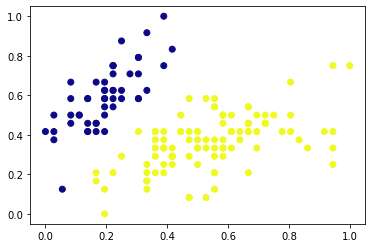

24


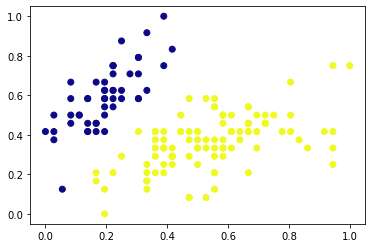

25


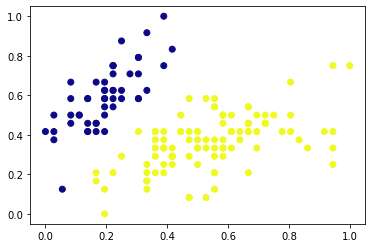

In [214]:
samples=5
score=[]
samples_plt=[]
while samples<=25:
    db=DBSCAN(eps=0.4, min_samples=samples)
    db.fit(x)
    labels=db.labels_
    score.append(silhouette_score(x, labels, metric='euclidean'))
    print(samples)
    plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
    plt.show() 
    samples_plt.append(samples)
    samples=samples+1

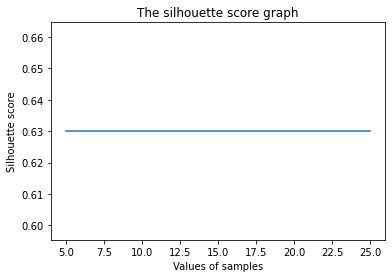

In [215]:
plt.plot(samples_plt, score)
plt.xlabel('Values of samples')
plt.ylabel('Silhouette score')
plt.title('The silhouette score graph')
plt.show()

0.6300471284354711


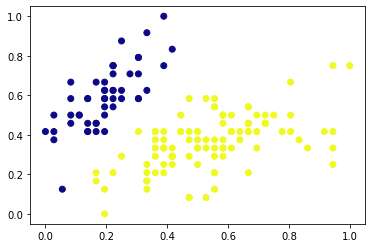

In [216]:
#the best number of samples is 10 with eps=0.9 

db=DBSCAN(eps=0.4, min_samples=10)
db.fit(x)
labels=db.labels_
score=silhouette_score(x, labels, metric='euclidean')
print(score)
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.show()

probabilty of spherical [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
probabilty of diag [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
probabilty of tied [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
probabilty of full [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


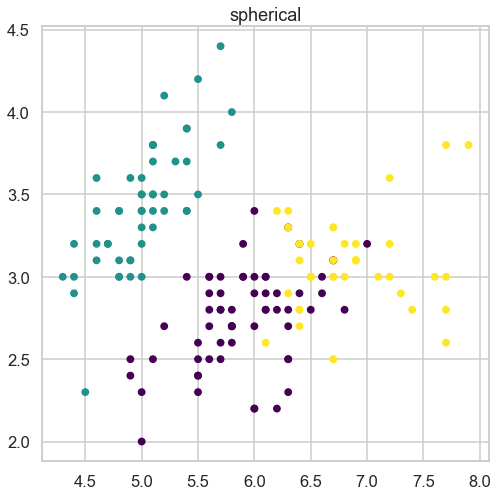

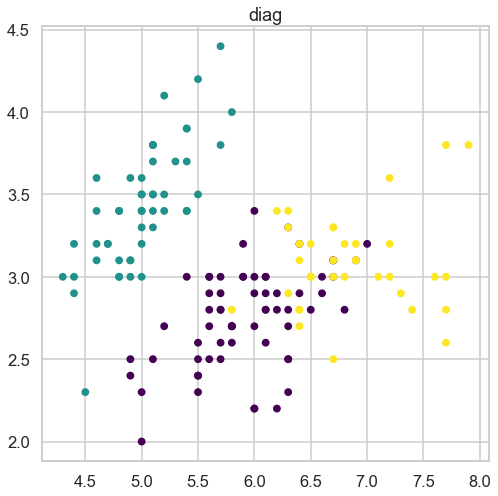

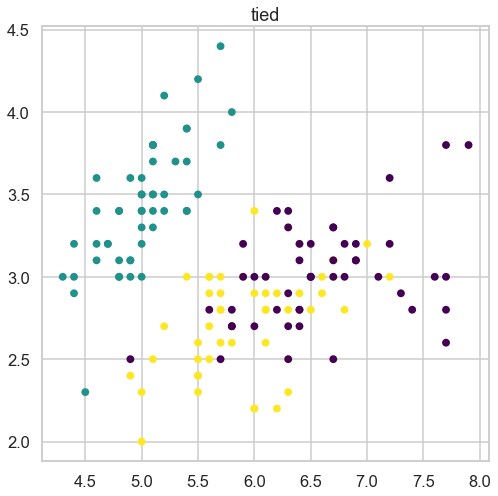

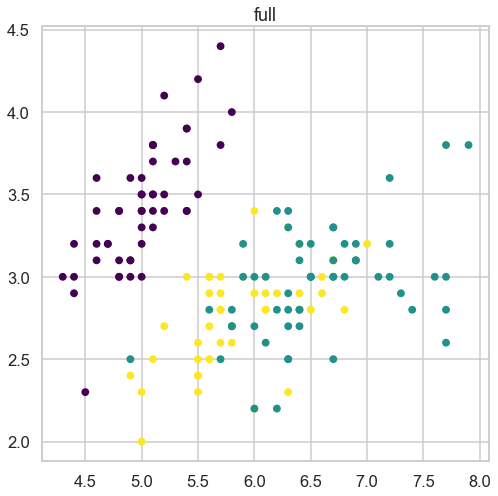

In [44]:
#GAUSSIAN
cov_type=["spherical", "diag", "tied", "full"]


for i in cov_type:
    GM=GaussianMixture(n_components=3, covariance_type=i,init_params='kmeans')
    GM.fit(x)
    labels = GM.predict(x)
    probs = GM.predict_proba(x)
    print("probabilty of",i,probs[:5].round(9))
    plt.figure()
    plt.title(i)
    plt.scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='viridis');
    plt.show
#The best covariance type is spherical

## Customer dataset
Repeat all the above on the customer data set 

In [35]:
data = pd.read_csv('Customer data.csv')#usecols=['Age','Income'])

In [36]:
data.head()

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

In [37]:
data = pd.read_csv('Customer data.csv',usecols=['Age','Income'])
data.head()

Age  Income
0   67  124670
1   22  150773
2   49   89210
3   45  171565
4   53  149031

In [38]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler ,MaxAbsScaler


In [39]:
scaler = MaxAbsScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(data)

# transform train and test sets
data_scaled = scaler.transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

Age    Income
0  0.881579  0.402988
1  0.289474  0.487364
2  0.644737  0.288366
3  0.592105  0.554573
4  0.697368  0.481733

In [69]:
# scaler = MinMaxScaler()

# # fit the scaler to the train set, it will learn the parameters
# scaler.fit(data)

# # transform train and test sets
# data_scaled = scaler.transform(data)
# data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
# data_scaled.head()

In [40]:
X_data = data_scaled.iloc[:, [0, 1]].values
X_data

array([[0.88157895, 0.40298807],
       [0.28947368, 0.4873644 ],
       [0.64473684, 0.28836581],
       ...,
       [0.40789474, 0.27928266],
       [0.31578947, 0.3166755 ],
       [0.32894737, 0.22115049]])

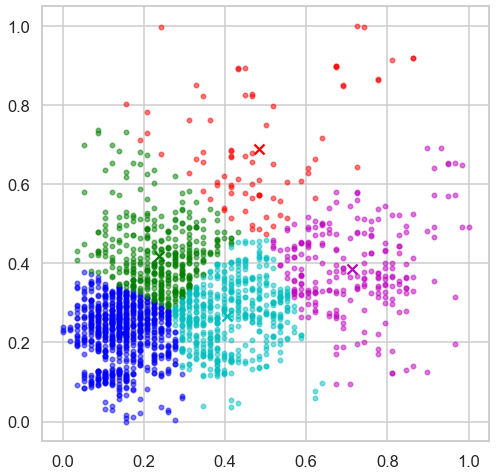

In [72]:
#kmeans
k=5
kmeans = KMeans(n_clusters=k, init='random')
kmeans.fit(X_data)
display_cluster(X_data,kmeans,num_clusters=k)

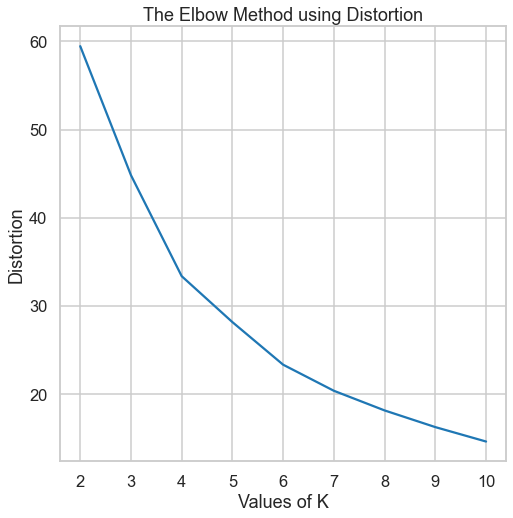

In [73]:
z=2
distortion1 = []
distortion2 = []
z_arr=[]
while z<=10:
    i=1
    while i<=100:
        kmeans = KMeans(n_clusters=z, init='random')
        kmeans.fit(X_data)
        distortion1.append(kmeans.inertia_)
        i=i+1
    distortion2.append(min(distortion1))
    z_arr.append(z)
    z=z+1
#print(distortion2)    
#print(z_arr) 
plt.plot(z_arr, distortion2)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

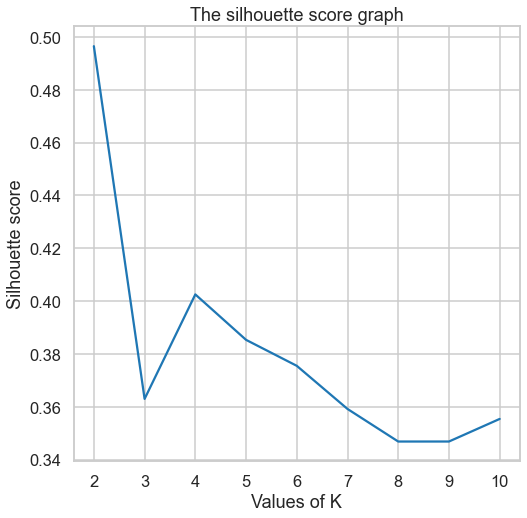

In [74]:
z=2
score=[]
z_arr=[]
while z<=10:
    kmeans = KMeans(n_clusters=z, init='random')
    kmeans.fit(X_data)
    score.append(silhouette_score(X_data, kmeans.labels_, metric='euclidean'))
    z_arr.append(z)
    z=z+1
#print(score)    
#print(z_arr)
plt.plot(z_arr, score)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('The silhouette score graph')
plt.show()

0.4023912174910105

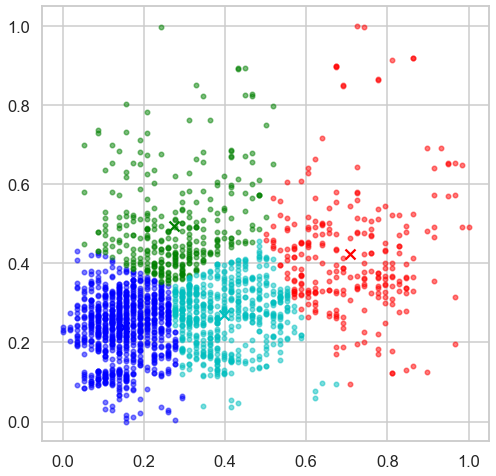

In [75]:
#The best values for the Kmeans are K=4 not the highest score but the best with the elbow method in considiration
k=4
kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(X_data)
display_cluster(X_data,kmeans,num_clusters=k)
score = silhouette_score(X_data, kmeans.labels_, metric='euclidean')
score

The silhouette score of cosine average 0.2061679354283047
The silhouette score of cosine single 0.2921187421329214
The silhouette score of euclidean average 0.4507855465288985
The silhouette score of euclidean single 0.5732227516833102
The silhouette score of manhattan average 0.4418709386349017
The silhouette score of manhattan single 0.5732227516833102


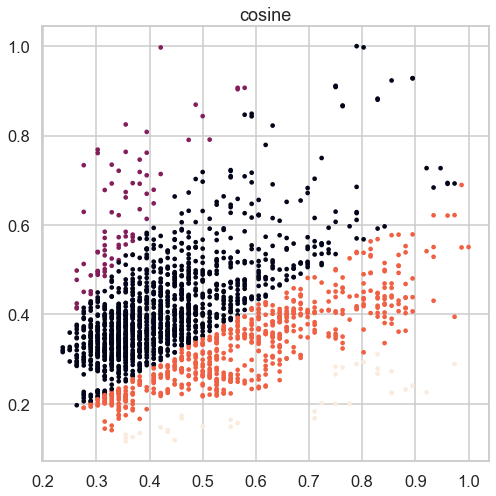

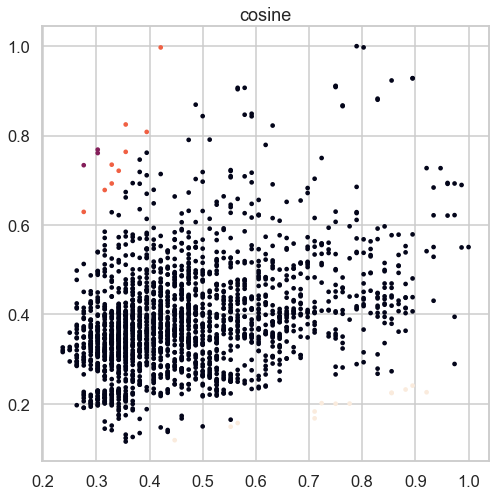

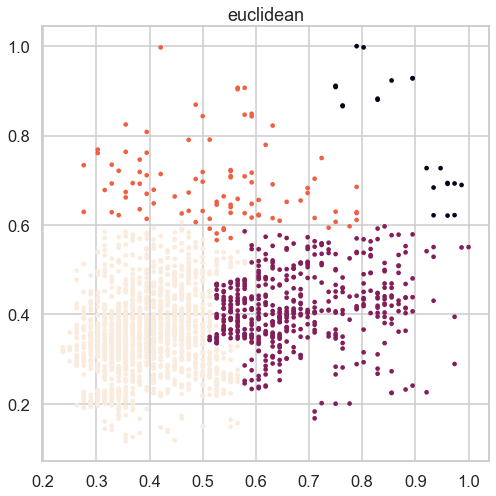

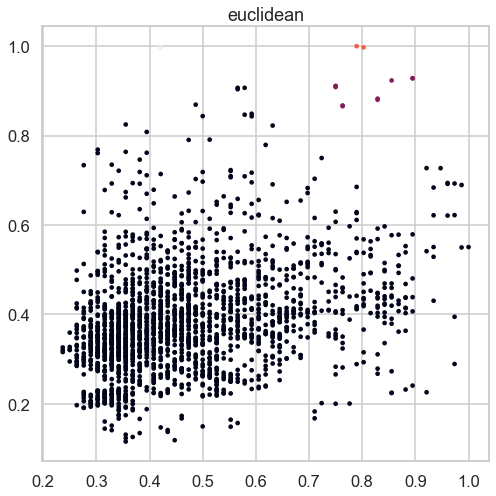

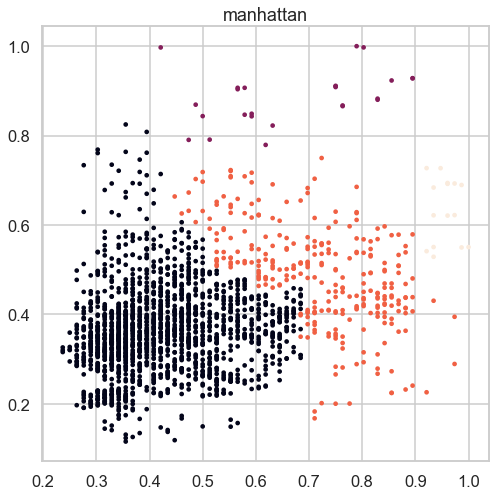

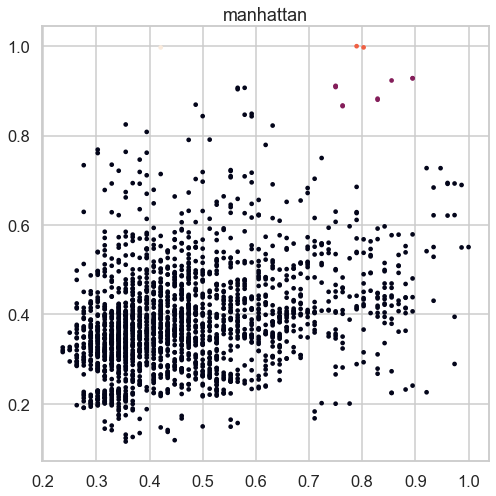

In [61]:
#Hierarichal clustring
affinity=['cosine','euclidean','manhattan']
linkage=['average','single']
for i in affinity:
    for x in linkage:
        HC=AgglomerativeClustering(n_clusters=4, affinity=i, linkage=x, distance_threshold=None)
        HC.fit(X_data)
        HC_labels=HC.labels_
        plt.figure()
        plt.title(i)
        plt.scatter(X_data[:, 0], X_data[:, 1], c=HC_labels, s=10);
        score = silhouette_score(X_data, HC.labels_, metric='euclidean')
        print('The silhouette score of',i,x,score)


<function matplotlib.pyplot.show(close=None, block=None)>

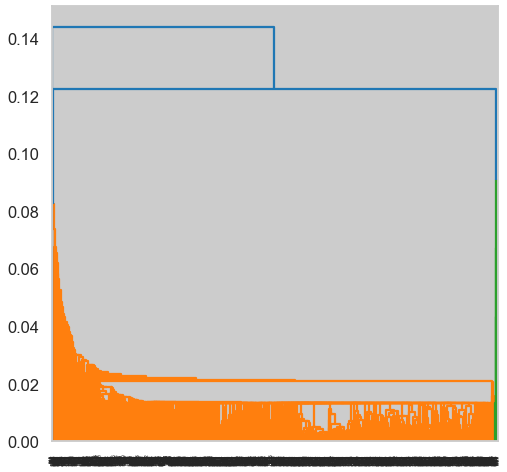

In [45]:
dendrogram(linkage(X_data,method='single'))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

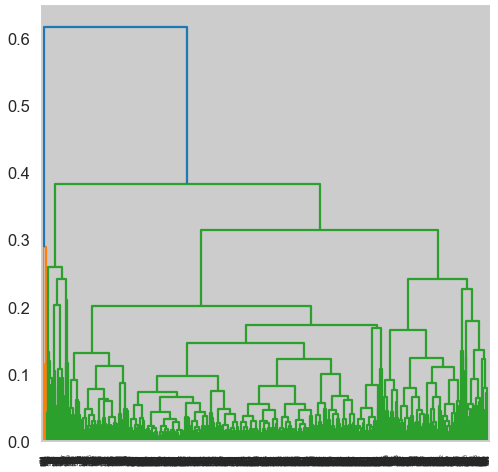

In [46]:
dendrogram(linkage(X_data,method='average'))
plt.show

In [ ]:
#The distance threshold varies so I worked on 4 clusters to test different models
#The best model is euclidien distance and manhatten distance with single linkage as they have the same silhoutte score

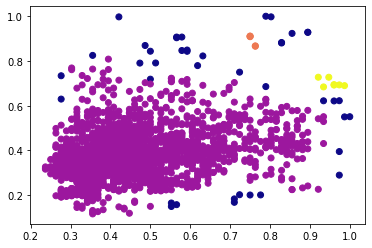

In [62]:
#dbscan
db=DBSCAN(eps=0.05, min_samples=5)
db.fit(X_data)
labels=db.labels_
##score=silhouette_score(Multi_blob_Data, labels, metric='euclidean')
#print(score)
plt.scatter(X_data[:, 0], X_data[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.show()

0.01


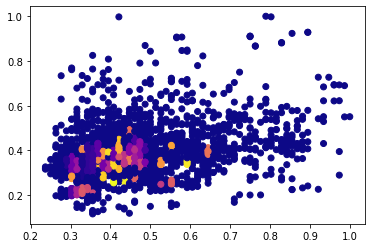

0.02


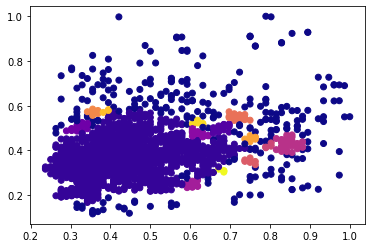

0.03


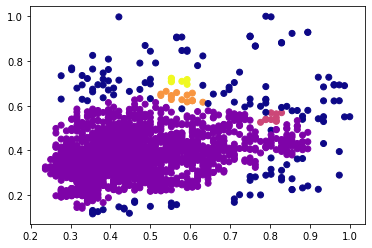

0.04


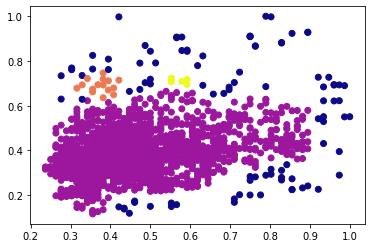

0.05


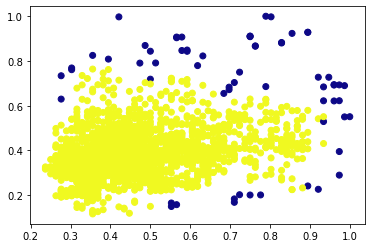

0.060000000000000005


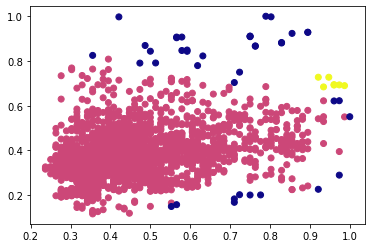

0.07


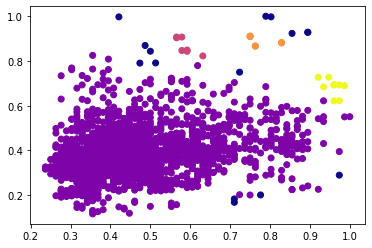

0.08


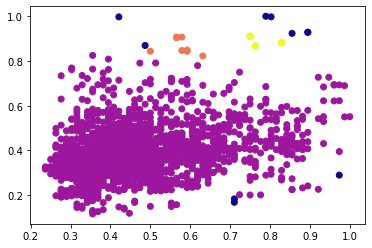

0.09


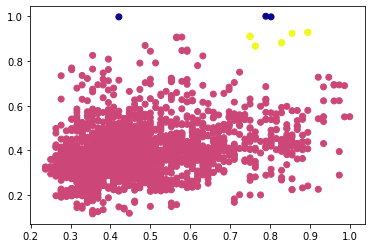

0.09999999999999999


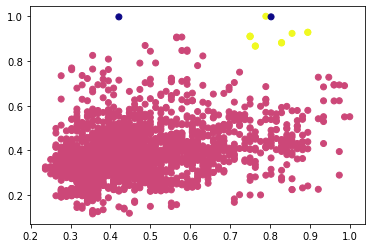

In [74]:
epss=0.01
score=[]
eps_plt=[]
while epss<0.1:
    db=DBSCAN(eps=epss, min_samples=7)
    db.fit(X_data)
    labels=db.labels_
    score.append(silhouette_score(X_data, labels, metric='euclidean'))
    print(epss)
    plt.scatter(X_data[:, 0], X_data[:,1], c = labels, cmap= "plasma") # plotting the clusters
    plt.show()
    eps_plt.append(epss)
    epss=epss+0.01

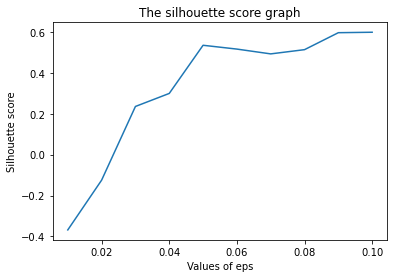

In [75]:
plt.plot(eps_plt, score)
plt.xlabel('Values of eps')
plt.ylabel('Silhouette score')
plt.title('The silhouette score graph')
plt.show()

5


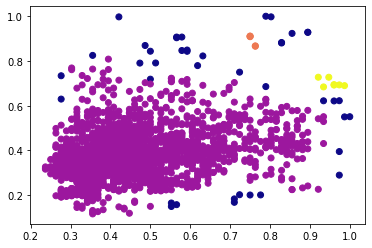

6


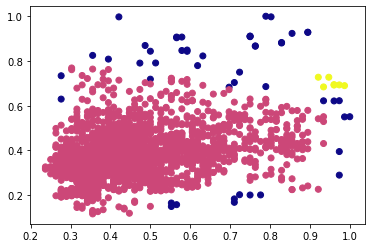

7


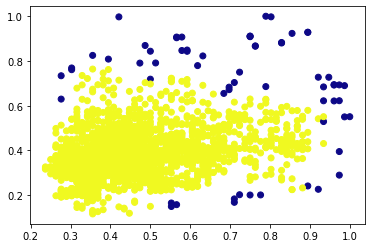

8


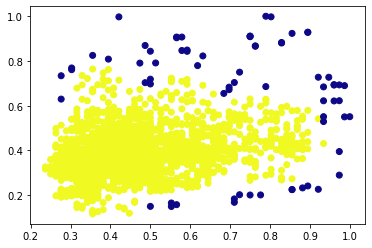

9


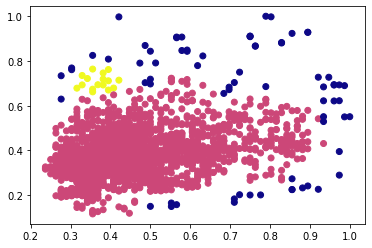

10


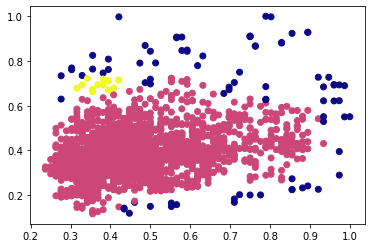

11


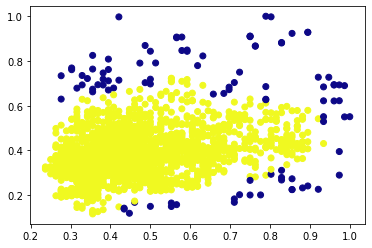

12


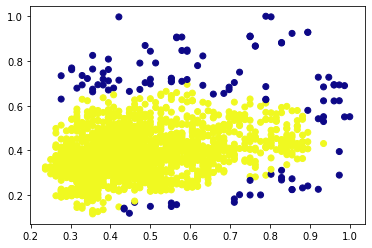

13


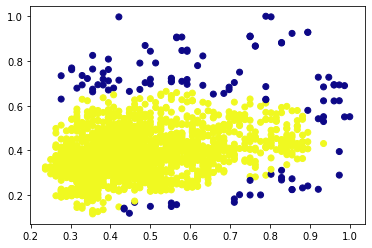

14


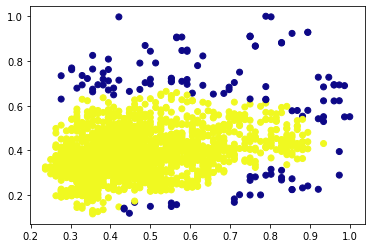

15


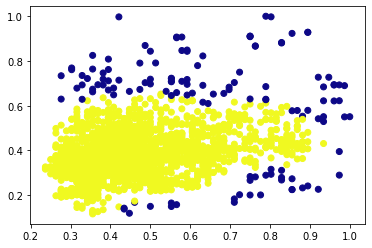

16


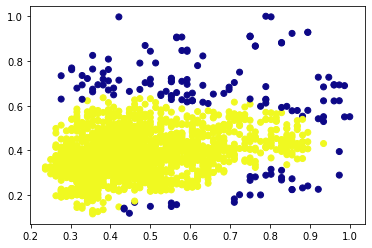

17


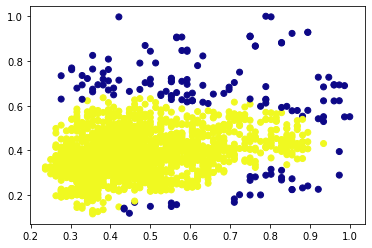

18


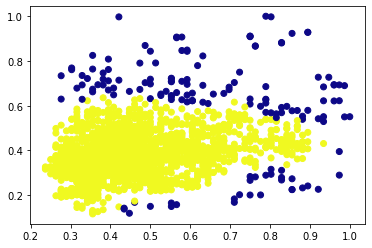

19


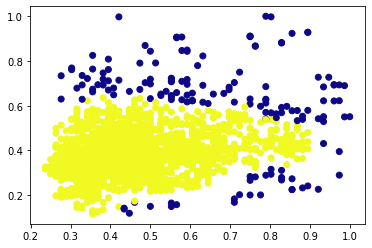

20


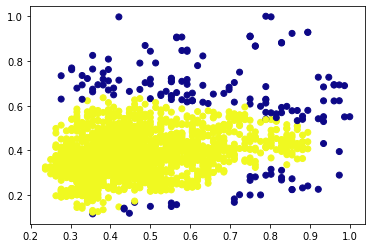

21


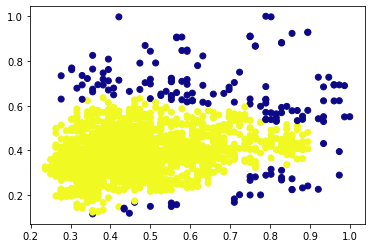

22


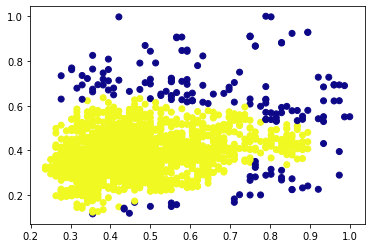

23


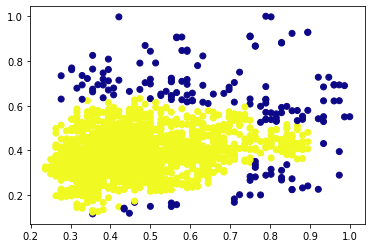

24


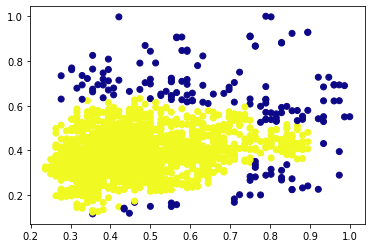

25


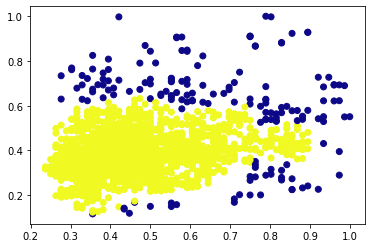

In [42]:
samples=5
score=[]
samples_plt=[]
while samples<=25:
    db=DBSCAN(eps=0.05, min_samples=samples)
    db.fit(X_data)
    labels=db.labels_
    score.append(silhouette_score(X_data, labels, metric='euclidean'))
    print(samples)
    plt.scatter(X_data[:, 0], X_data[:,1], c = labels, cmap= "plasma") # plotting the clusters
    plt.show() 
    samples_plt.append(samples)
    samples=samples+1

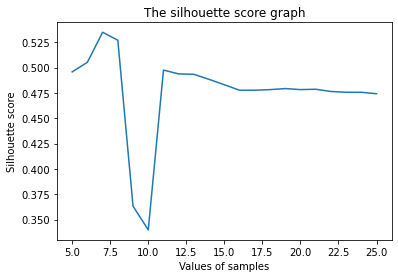

In [43]:
plt.plot(samples_plt, score)
plt.xlabel('Values of samples')
plt.ylabel('Silhouette score')
plt.title('The silhouette score graph')
plt.show()

0.5963436734974734


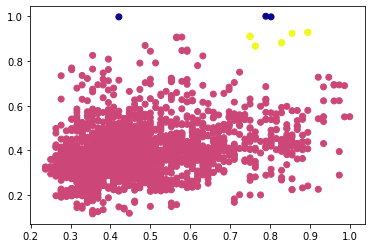

In [81]:
#the best number of samples is 7 with eps=0.09 

db=DBSCAN(eps=0.09, min_samples=7)
db.fit(X_data)
labels=db.labels_
score=silhouette_score(X_data, labels, metric='euclidean')
print(score)
plt.scatter(X_data[:, 0], X_data[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.show()

probabilty of spherical [[9.983e-01 1.600e-03 1.000e-04 0.000e+00]
 [1.530e-02 3.270e-02 5.435e-01 4.085e-01]
 [2.130e-01 7.733e-01 1.290e-02 8.000e-04]
 [4.217e-01 2.351e-01 3.431e-01 1.000e-04]
 [7.332e-01 2.175e-01 4.940e-02 0.000e+00]]
probabilty of diag [[0.     0.9975 0.0025 0.    ]
 [0.7138 0.     0.0804 0.2057]
 [0.     0.1635 0.8103 0.0262]
 [0.     0.3057 0.3201 0.3742]
 [0.     0.7461 0.2387 0.0152]]
probabilty of tied [[2.000e-04 9.998e-01 0.000e+00 0.000e+00]
 [8.345e-01 0.000e+00 1.655e-01 0.000e+00]
 [3.515e-01 6.484e-01 1.000e-04 0.000e+00]
 [4.146e-01 2.544e-01 3.306e-01 4.000e-04]
 [5.760e-02 9.385e-01 3.900e-03 0.000e+00]]
probabilty of full [[0.003  0.     0.997  0.    ]
 [0.0238 0.6251 0.     0.3511]
 [0.8088 0.     0.1735 0.0178]
 [0.4145 0.     0.2003 0.3852]
 [0.3747 0.     0.611  0.0142]]


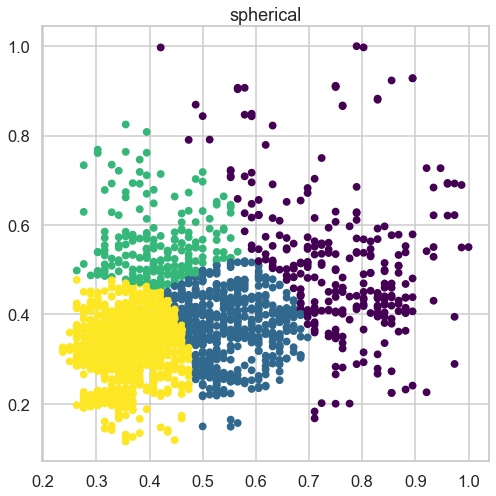

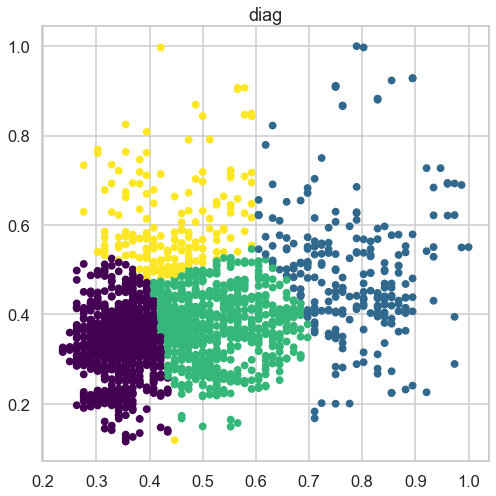

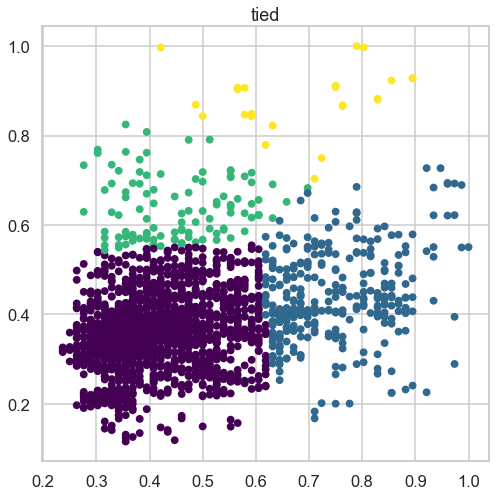

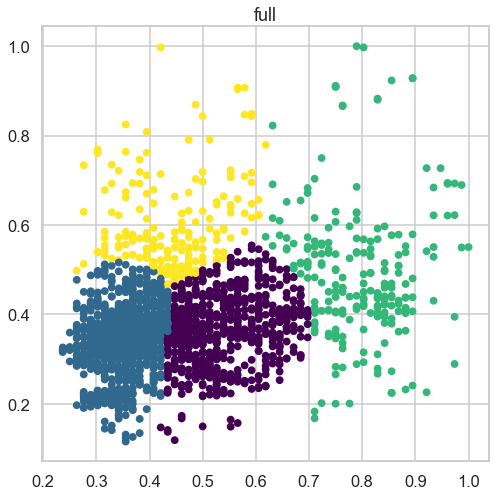

In [43]:
#gaussian
#Gaussian
cov_type=["spherical", "diag", "tied", "full"]


for i in cov_type:
    GM=GaussianMixture(n_components=4, covariance_type=i,init_params='kmeans')
    GM.fit(X_data)
    labels = GM.predict(X_data)
    probs = GM.predict_proba(X_data)
    print("probabilty of",i,probs[:5].round(4))
    plt.figure()
    plt.title(i)
    plt.scatter(X_data[:, 0], X_data[:, 1], c=labels, s=40, cmap='viridis');
    plt.show
#tied or spherical